In [23]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

'pt_BR.utf8'

In [24]:
# Dias de permanência por hospital

df_Hosp = pd.read_excel(r'https://github.com/edufurlani/DoencasRespiratorias/raw/main/Data/DiasPermEstabSaude.xlsx')
df_Hosp = df_Hosp.iloc[:, :-1]
#df_Hosp.columns

df_Hosp.head()

Mês/ano de competência  2077531 A C CAMARGO CANCER CENTER  \
0                 jan/08                                 10   
1                 fev/08                                 52   
2                 mar/08                                 31   
3                 abr/08                                 20   
4                 mai/08                                112   

   2077655 ASSOC AACD V CLEMENTINO  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER  \
0                                                0   
1                                                8   
2                                               20   
3                                                0   
4                                               20   

   2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   2080575 HOSP BENEF PORTUGUESA  2078015 HOSP CLINICAS - HC DA FMUSP  \
0                            114                                    0   
1                            475                                 1546   
2                            627                                 2704   
3                            656                                 4181   
4                            236                                 2756   

   2075962 HOSP DA STA CASA DE STO AMARO  2077469 HOSP DOM ALVARENGA  ...  \
0                                    347                           0  ...   
1                                    269                          83  ...   
2                                    455                         121  ...   
3                                    502                         192  ...   
4                                    449                         432  ...   

   2082624 HOSPITAL JAPONES SANTA CRUZ  2077507 HOSPITAL LEFORTE - LIBERDADE  \
0                                    0                                    44   
1                                    0                                    76   
2                                    0                                   134   
3                                    0                                    44   
4                                    0                                   130   

   2076896 HOSPITAL SAO LUIZ GONZAGA  6891411 IBCC UNIDADE JACANA  \
0                                  3                            0   
1                                557                            0   
2                                470                            0   
3                                642                            0   
4                                913                            0   

   2077590 INST BRAS. CONTROLE CANCER-IBCC  \
0                                        0   
1                                        1   
2                                       15   
3                                       20   
4                                        7   

   2091550 INST CEMA DE OFTALMO E OTORRINO  \
0                                        4   
1                                        7   
2                                        3   
3                                        7   
4                                        6   

   6123

In [25]:
# Quebrando a coluna de data

df_Hosp['Mês/ano de competência'] = pd.to_datetime(df_Hosp['Mês/ano de competência'], format='%b/%y')

# Dividindo por ano/mes/dia
df_Hosp['Ano'] = df_Hosp['Mês/ano de competência'].dt.year
df_Hosp['Mês'] = df_Hosp['Mês/ano de competência'].dt.month

df_Hosp.drop('Mês/ano de competência',axis=1, inplace=True)

df_Hosp.head(5)

2077531 A C CAMARGO CANCER CENTER  2077655 ASSOC AACD V CLEMENTINO  \
0                                 10                                0   
1                                 52                                0   
2                                 31                                0   
3                                 20                                0   
4                                112                                0   

   2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER  \
0                                                0   
1                                                8   
2                                               20   
3                                                0   
4                                               20   

   2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   2080575 HOSP BENEF PORTUGUESA  2078015 HOSP CLINICAS - HC DA FMUSP  \
0                            114                                    0   
1                            475                                 1546   
2                            627                                 2704   
3                            656                                 4181   
4                            236                                 2756   

   2075962 HOSP DA STA CASA DE STO AMARO  2077469 HOSP DOM ALVARENGA  \
0                                    347                           0   
1                                    269                          83   
2                                    455                         121   
3                                    502                         192   
4                                    449                         432   

   2028840 HOSP EST - INSTITUTO DE INFECTOLOGIA EMILIO RIBAS  ...  \
0                                                146          ...   
1                                                 40          ...   
2                                                162          ...   
3                                                  0          ...   
4                                                211          ...   

   2076896 HOSPITAL SAO LUIZ GONZAGA  6891411 IBCC UNIDADE JACANA  \
0                                  3                            0   
1                                557                            0   
2                                470                            0   
3                                642                            0   
4                                913                            0   

   2077590 INST BRAS. CONTROLE CANCER-IBCC  \
0                                        0   
1                                        1   
2                                       15   
3                                       20   
4                                        7   

   2091550 INST CEMA DE OFTALMO E OTORRINO  \
0                                        4   
1                                        7   
2                                        3   
3                                        7   
4                                        6   

   6123740 INST DO CANCER DO ESTADO DE SAO PAULO  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4            

In [26]:
# Agrupando todas as colunas em uma

df_serie_hist  = df_Hosp.melt(id_vars=['Ano', 'Mês'], var_name='Hospital', value_name='Internações')

# Buscando o máximo de internações que cada hospital teve na série histórica

max_internacoes_por_hospital = df_serie_hist.groupby('Hospital')['Internações'].max()

# Adicionando uma coluna para o máximo de internações na série histórica

df_serie_hist['Lotação Máxima'] = df_serie_hist['Hospital'].map(max_internacoes_por_hospital)

# Adicionando uma coluna com a porcentagem de ocupação

df_serie_hist['Ocupação'] = (df_serie_hist['Internações'] / df_serie_hist['Lotação Máxima'])*100

# Filtro

#df_serie_hist.loc[df_serie_hist['Hospital'] == 'Nome do hospital']

# Vizualização
df_serie_hist.to_csv("serie_hist.csv", index=False)
df_serie_hist.head(12)


Ano  Mês                           Hospital  Internações  Lotação Máxima  \
0   2008    1  2077531 A C CAMARGO CANCER CENTER           10             413   
1   2008    2  2077531 A C CAMARGO CANCER CENTER           52             413   
2   2008    3  2077531 A C CAMARGO CANCER CENTER           31             413   
3   2008    4  2077531 A C CAMARGO CANCER CENTER           20             413   
4   2008    5  2077531 A C CAMARGO CANCER CENTER          112             413   
5   2008    6  2077531 A C CAMARGO CANCER CENTER           30             413   
6   2008    7  2077531 A C CAMARGO CANCER CENTER           89             413   
7   2008    8  2077531 A C CAMARGO CANCER CENTER           54             413   
8   2008    9  2077531 A C CAMARGO CANCER CENTER          150             413   
9   2008   10  2077531 A C CAMARGO CANCER CENTER          172             413   
10  2008   11  2077531 A C CAMARGO CANCER CENTER           38             413   
11  2008   12  2077531 A C CAMARGO CANCER CENTER          193             413   

     Ocupação  
0    2.421308  
1   12.590799  
2    7.506053  
3    4.842615  
4   27.118644  
5    7.263923  
6   21.549637  
7   13.075061  
8   36.319613  
9   41.646489  
10   9.200969  
11  46.731235

In [27]:
# Salvando as colunas Hospital e Lotação Máxima do dataframe df_serie_hist

ocupacao = df_serie_hist[['Hospital', 'Lotação Máxima']]

# Descobrindo a média de internações para cada mês e hospital, com base na série histórica

df_media_hist = df_serie_hist.groupby(['Hospital', 'Mês'])['Internações'].mean().astype(int).reset_index()

# Adicionando as colunas salvas anteriormente

df_media_hist = df_media_hist.merge(ocupacao, on=['Hospital'])

# Calculando a taxa de ocupação

df_media_hist['taxa_ocupacao'] = (df_media_hist['Internações'] / df_media_hist['Lotação Máxima'])*100

# Dropando as linhas duplicadas

df_media_hist.drop_duplicates(inplace=True)

# Filtro

#df_media_hist.loc[df_media_hist['Hospital'] == 'Nome do hospital']

# Vizualização
df_media_hist.head()

Hospital  Mês  Internações  \
0    0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...    1           83   
187  0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...    2          111   
374  0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...    3          112   
561  0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...    4           66   
748  0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...    5           88   

     Lotação Máxima  taxa_ocupacao  
0              1800       4.611111  
187            1800       6.166667  
374            1800       6.222222  
561            1800       3.666667  
748            1800       4.888889

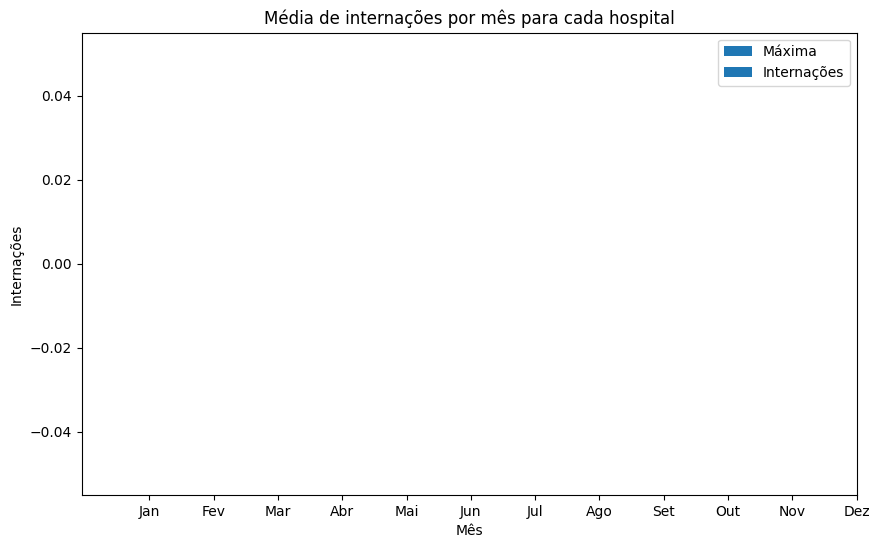

In [28]:
# Criar uma figura e eixos
plt.figure(figsize=(10, 6))

# Iterar sobre cada hospital
hospital = input('Nome do hospital')
# Filtrar os dados apenas para o hospital atual
data_hospital = df_media_hist[df_media_hist['Hospital'] == hospital]

# Plotar os dados de internações para cada mês para o hospital atual

plt.bar(data_hospital['Mês'], data_hospital['Lotação Máxima'], label='Máxima')
plt.bar(data_hospital['Mês'], data_hospital['Internações'], label='Internações')

# Adicionar os valores das internações dentro das barras
for index, row in data_hospital.iterrows():
    plt.text(row['Mês'], row['Internações'] + 5, str(row['Internações']), ha='center', va='bottom')

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Internações')
plt.title('Média de internações por mês para cada hospital')
plt.legend()

# Definir os ticks do eixo x para mostrar os meses
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Mostrar o gráfico
#plt.grid(True)
plt.show()

In [29]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pandas.tseries.offsets import DateOffset
import pandas as pd
import matplotlib.pyplot as plt

Previsão para o hospital '2077531 A C CAMARGO CANCER CENTER':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1893.853, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1865.225, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1840.274, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1891.859, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1838.369, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1840.281, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1839.920, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1839.877, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1863.233, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1837.889, Time=0.16 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1839.803, Time=0.39 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1839.799, Time=0.55 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:35:33 - cmdstanpy - INFO - Chain [1] start processing
12:35:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 41.33231263207093
RMSE do modelo Prophet: 174.7686264856413
O modelo SARIMAX é o melhor para este hospital.


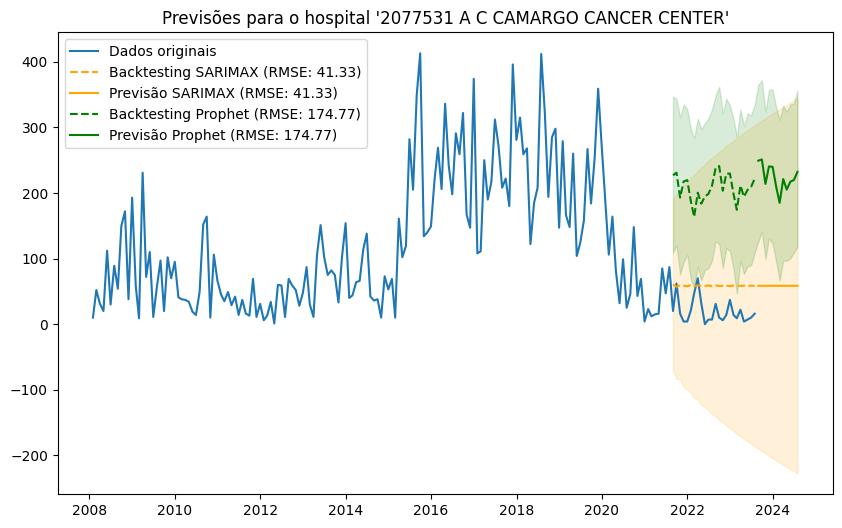

Previsão para o hospital '2077655 ASSOC AACD V CLEMENTINO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1125.952, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1212.628, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1170.217, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1118.304, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1210.628, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1116.304, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1118.304, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1119.952, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1118.288, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1118.288, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1168.270, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1120.290, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1114.734, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1116.734, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1116.734, Time=0.07

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:35:36 - cmdstanpy - INFO - Chain [1] start processing
12:35:36 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 8.527480126284615
RMSE do modelo Prophet: 8.834948358695723
O modelo SARIMAX é o melhor para este hospital.


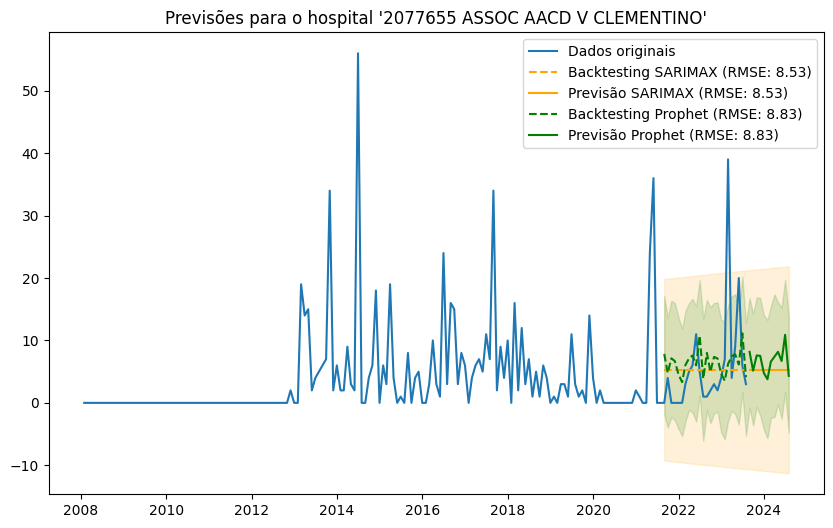

Previsão para o hospital '2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1675.871, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1633.155, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1673.911, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1631.639, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1633.186, Time=0.11 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1616.129, Time=0.08 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1617.709, Time=0.16 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1617.706, Time=0.29 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=1617.742, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[12] 

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:35:45 - cmdstanpy - INFO - Chain [1] start processing
12:35:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 40.20896288398782
RMSE do modelo Prophet: 36.939197911209334
O modelo Prophet é o melhor para este hospital.


Previsão para o hospital '2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1058.308, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1154.403, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1103.685, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1054.381, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1152.403, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1053.757, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1054.509, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1056.096, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1055.383, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1055.417, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1101.816, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1051.925, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1052.804, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1052.705, Time=0.08 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:35:48 - cmdstanpy - INFO - Chain [1] start processing
12:35:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 2.586519301774535
RMSE do modelo Prophet: 4.524648756509182
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2046.271, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2008.816, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1991.586, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2044.282, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1989.929, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1991.589, Time=0.23 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1991.929, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1991.929, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2007.417, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1987.997, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1989.649, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1989.646, Time=0.13 sec
 ARIMA(0,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:35:52 - cmdstanpy - INFO - Chain [1] start processing
12:35:53 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 63.05562673232145
RMSE do modelo Prophet: 77.51928430007789
O modelo SARIMAX é o melhor para este hospital.


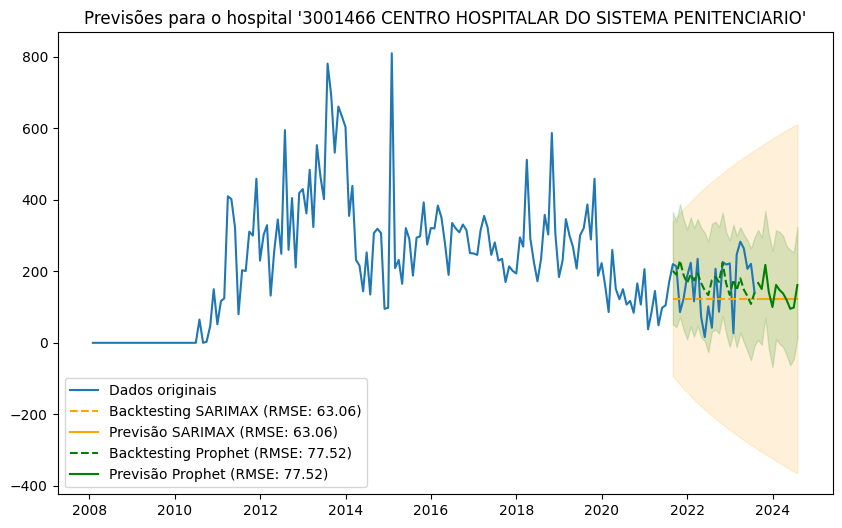

Previsão para o hospital '2080575 HOSP BENEF PORTUGUESA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2155.340, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2234.527, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2182.861, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2150.466, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2232.529, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2150.639, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2150.756, Time=0.45 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2150.949, Time=0.21 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2229.260, Time=0.12 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2151.757, Time=0.36 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2151.733, Time=0.26 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2182.152, Time=0.22 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2152.967, Time=0.52 sec
 ARIM

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:35:59 - cmdstanpy - INFO - Chain [1] start processing
12:35:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 25.573400785976578
RMSE do modelo Prophet: 131.58602808233806
O modelo SARIMAX é o melhor para este hospital.


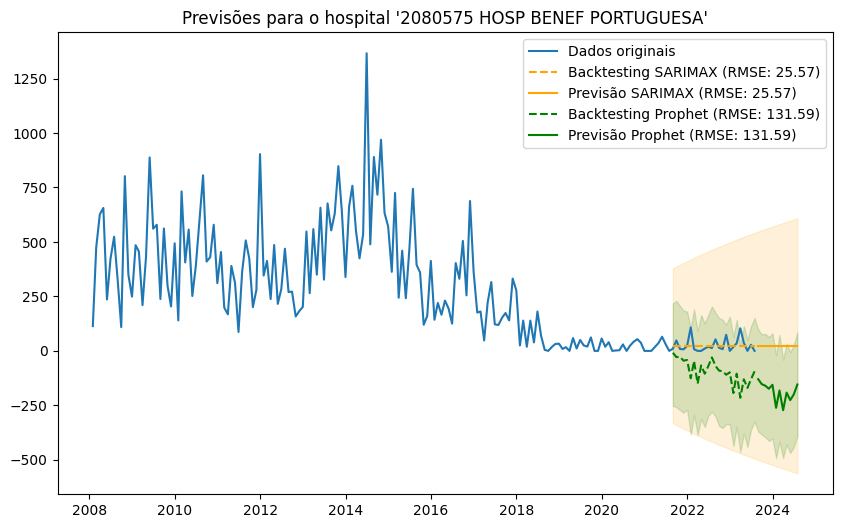

Previsão para o hospital '2078015 HOSP CLINICAS - HC DA FMUSP':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2539.924, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2522.505, Time=0.75 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2517.857, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2537.932, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2519.235, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2517.877, Time=0.53 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2518.452, Time=0.52 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2517.215, Time=0.30 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2518.054, Time=0.69 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2540.876, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2512.632, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2514.341, Time=0.18 sec
 ARIMA(0,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:36:12 - cmdstanpy - INFO - Chain [1] start processing
12:36:12 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 262.6507536545387
RMSE do modelo Prophet: 399.2649770356595
O modelo SARIMAX é o melhor para este hospital.


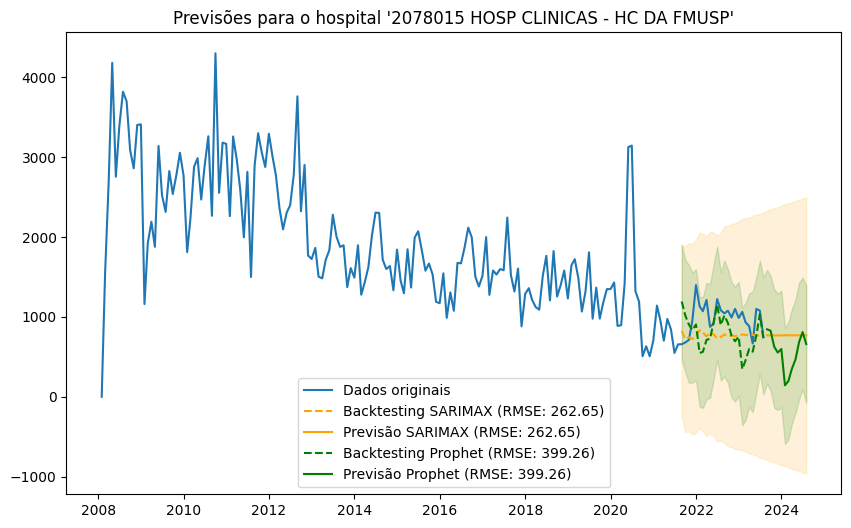

Previsão para o hospital '2075962 HOSP DA STA CASA DE STO AMARO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2034.417, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1969.851, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1971.368, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2032.437, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1970.924, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1961.699, Time=0.41 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1955.852, Time=0.88 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1957.290, Time=0.37 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1955.625, Time=0.87 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1966.256, Time=0.38 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1970.825, Time=0.15 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=2019.349, Time=0.56 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=1949.829, Time=1.03 sec
 ARIM

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:37:04 - cmdstanpy - INFO - Chain [1] start processing
12:37:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 136.16732259736793
RMSE do modelo Prophet: 117.78498061770902
O modelo Prophet é o melhor para este hospital.


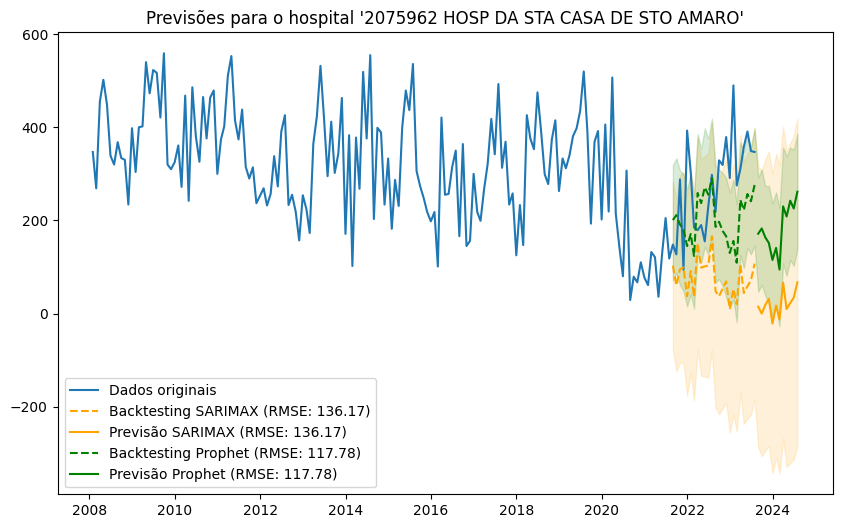

Previsão para o hospital '2077469 HOSP DOM ALVARENGA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1822.570, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1932.543, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1845.492, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1823.435, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1930.543, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1820.869, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1823.483, Time=0.28 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1822.183, Time=1.20 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1820.580, Time=0.77 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1822.557, Time=1.58 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1823.801, Time=1.92 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1820.333, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1823.800, Time=0.14 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=1822.274, Time=0.90 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=1822.302, Time=0.77

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:37:36 - cmdstanpy - INFO - Chain [1] start processing
12:37:36 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 3.574229636853418e-05
RMSE do modelo Prophet: 69.25991552453372
O modelo SARIMAX é o melhor para este hospital.


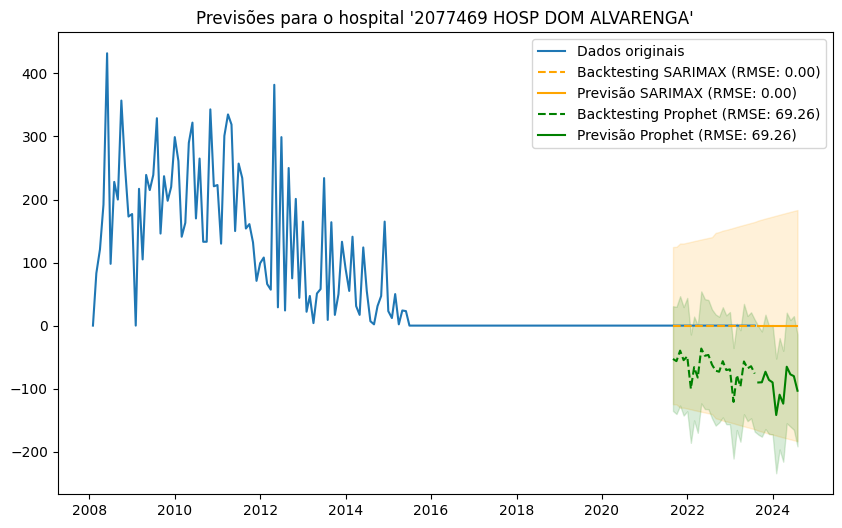

Previsão para o hospital '2028840 HOSP EST - INSTITUTO DE INFECTOLOGIA EMILIO RIBAS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2021.683, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2020.783, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2019.119, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2019.690, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2017.588, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2019.053, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2020.567, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2006.303, Time=0.14 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2007.919, Time=0.37 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2007.962, Time=0.32 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=2009.589, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=1992.719, Time=0.22 sec
 ARIMA(0,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:37:45 - cmdstanpy - INFO - Chain [1] start processing
12:37:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 71.74938149144195
RMSE do modelo Prophet: 141.1953743305731
O modelo SARIMAX é o melhor para este hospital.


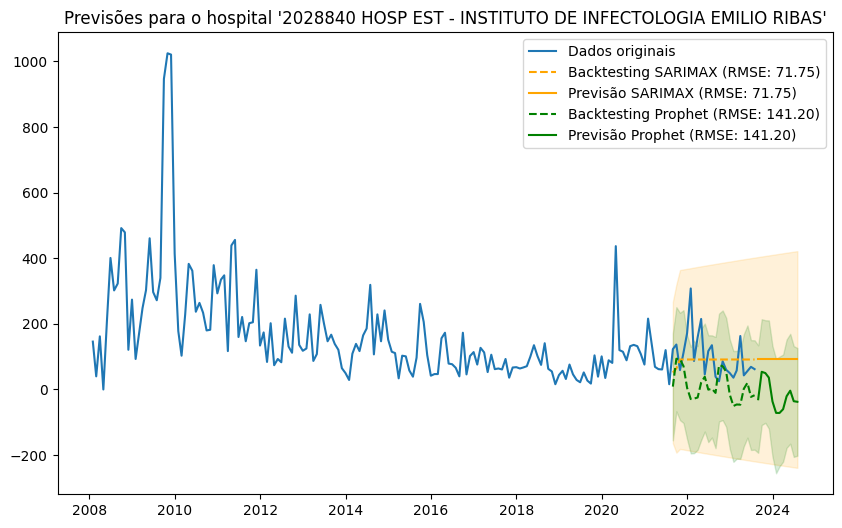

Previsão para o hospital '2088495 HOSP EST DANTE PAZZANESE- FUND ADIB JATENE':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1913.977, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1917.635, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1917.571, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2147.068, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1915.734, Time=0.15 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1915.731, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1915.706, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1915.786, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1917.924, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.162 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:37:48 - cmdstanpy - INFO - Chain [1] start processing
12:37:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 195.57777651529497
RMSE do modelo Prophet: 74.24321253121492
O modelo Prophet é o melhor para este hospital.


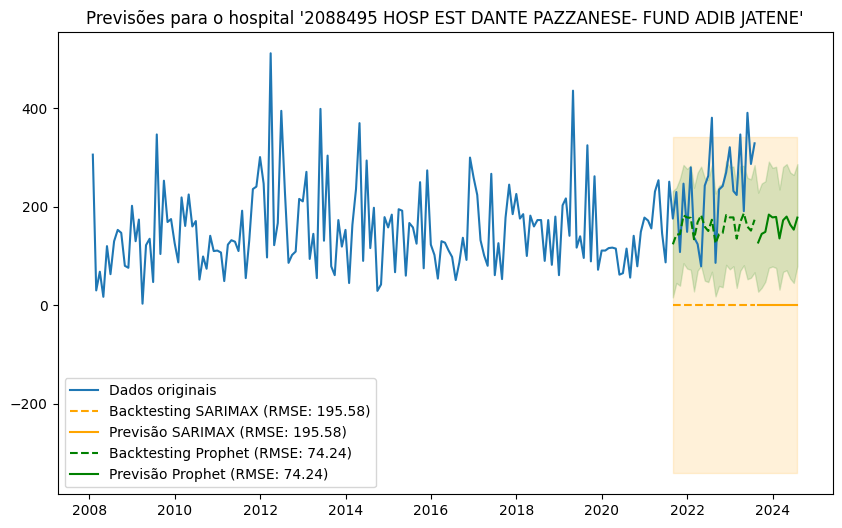

Previsão para o hospital '2077671 HOSP EST GRAJAU':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2566.095, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2533.193, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2564.110, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2531.846, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2533.217, Time=0.06 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2532.815, Time=0.46 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2523.623, Time=0.03 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2522.957, Time=0.10 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=2523.593, Time=0.32 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=2518.667, Time=0.66 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=2523.420, Time=0.08 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=2520.475, Time=1.66 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=2520.429, Time=1.51 sec
 ARIM

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 324.0254212767898
RMSE do modelo Prophet: 358.7520803975236
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2079240 HOSP EST GUAIANASES - JESUS TEIXEIRA DA COSTA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2255.689, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2292.325, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2270.806, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2262.658, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2290.332, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2261.995, Time=0.52 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2260.285, Time=0.71 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2256.915, Time=1.95 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2256.853, Time=1.74 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2265.287, Time=0.20 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2260.589, Time=1.11 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2257.257, Time=1.83 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2253.732, Time=0.65 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2261.217, Time=0.45 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:39:48 - cmdstanpy - INFO - Chain [1] start processing
12:39:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 290.72267896027796
RMSE do modelo Prophet: 268.3544926359009
O modelo Prophet é o melhor para este hospital.


Previsão para o hospital '2066572 HOSP EST HELIOPOLIS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2133.626, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2210.208, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2145.525, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2132.300, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2208.208, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2140.589, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2132.043, Time=0.35 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2130.530, Time=0.19 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2132.026, Time=0.62 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2198.160, Time=0.10 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2132.435, Time=0.51 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2132.481, Time=0.31 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2133.404, Time=0.57 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2128.590, Time=0.09 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:39:56 - cmdstanpy - INFO - Chain [1] start processing
12:39:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 183.27771616814357
RMSE do modelo Prophet: 170.33711860459965
O modelo Prophet é o melhor para este hospital.


Previsão para o hospital '2088517 HOSP EST INF CANDIDO FONTOURA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2428.430, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2374.509, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2426.443, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2391.951, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2376.440, Time=0.41 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2376.445, Time=0.29 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2377.815, Time=0.18 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2410.721, Time=0.29 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2354.613, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2386.508, Time=0.03 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=2356.585, Time=0.61 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=2356.579, Time=0.42 sec
 ARIMA(2,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:40:17 - cmdstanpy - INFO - Chain [1] start processing
12:40:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 387.1069414559811
RMSE do modelo Prophet: 490.0738060767935
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2071371 HOSP EST INF DARCY VARGAS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2078.283, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2067.974, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2063.103, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2076.284, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2071.449, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2062.367, Time=0.40 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2061.512, Time=0.27 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2063.095, Time=0.56 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2062.878, Time=0.80 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2074.854, Time=0.10 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2059.513, Time=0.09 sec
 ARIMA(0,1,1)(0

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:40:28 - cmdstanpy - INFO - Chain [1] start processing
12:40:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 81.64581856048589
RMSE do modelo Prophet: 148.24722112465815
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2077523 HOSP EST IPIRANGA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2184.730, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2151.063, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2106.889, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2182.736, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2105.518, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2106.879, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2106.668, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2106.758, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2149.096, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2107.464, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2105.922, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 2.958 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:40:32 - cmdstanpy - INFO - Chain [1] start processing
12:40:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 125.08869980385282
RMSE do modelo Prophet: 149.49875813994547
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2077620 HOSP EST ITAIM PAULISTA (SANTA MARCELINA)':
Hospital '2077620 HOSP EST ITAIM PAULISTA (SANTA MARCELINA)' não encontrado.
Previsão para o hospital '5437156 HOSP EST LOCAL DE SAPOPEMBA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_hospital = data[data['Hospital'].str.contains(hospital_name, na=False, case=False)]
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1908.210, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1943.756, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1923.024, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1904.447, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1941.763, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1904.958, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1906.190, Time=0.45 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1906.392, Time=0.59 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1904.510, Time=0.16 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1907.395, Time=0.88 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1943.545, Time=0.10 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1902.369, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1903.041, Time=0.11 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1904.210, Time=0.52 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=1904.348, Time=0.71

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:40:45 - cmdstanpy - INFO - Chain [1] start processing
12:40:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 110.03534291879409
RMSE do modelo Prophet: 157.05508240298062
O modelo SARIMAX é o melhor para este hospital.


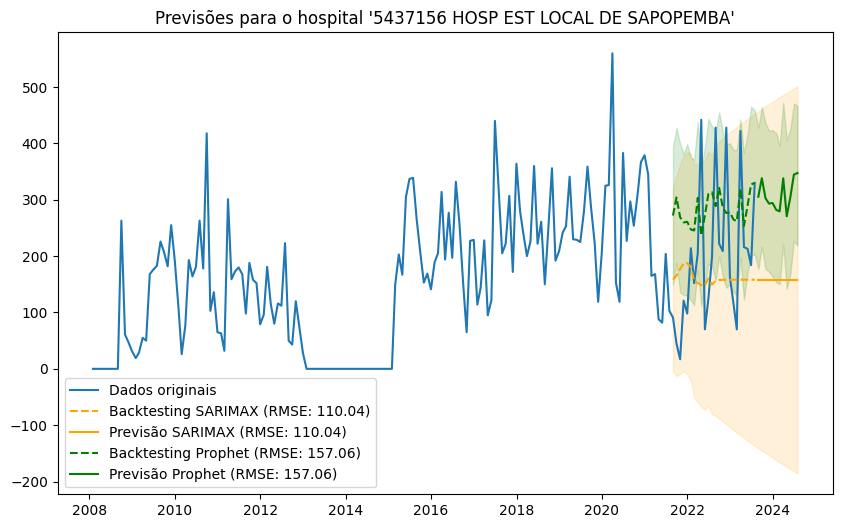

Previsão para o hospital '2077574 HOSP EST MANDAQUI':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2521.552, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2492.046, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2476.389, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2519.565, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2478.640, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2467.034, Time=0.53 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2474.577, Time=0.16 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2468.941, Time=1.59 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2472.671, Time=0.76 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2470.850, Time=0.80 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2469.837, Time=0.65 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=2469.808, Time=1.61 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2519.704, Time=0.38 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2463.616, Time=0.64 sec


c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:41:31 - cmdstanpy - INFO - Chain [1] start processing
12:41:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 384.2766445190187
RMSE do modelo Prophet: 451.64479661354943
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2065665 HOSP EST MAT INTERLAGOS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1284.675, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1273.853, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1277.209, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1277.214, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1279.854, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1275.691, Time=0.13 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1275.715, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1277.342, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1275.340, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1275.325, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1277.317, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.809 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:41:34 - cmdstanpy - INFO - Chain [1] start processing
12:41:34 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 34.34688243979842
RMSE do modelo Prophet: 33.49926328083192
O modelo Prophet é o melhor para este hospital.


Previsão para o hospital '2077701 HOSP EST MAT LEONOR MENDES DE BARROS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1432.341, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1557.730, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1502.208, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1440.463, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1555.730, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1431.561, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1431.373, Time=0.14 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1431.206, Time=0.37 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1432.104, Time=0.80 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1434.104, Time=1.27 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1436.025, Time=0.43 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1432.416, Time=0.34 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=1429.357, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=1429.296, Time=0.22 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=1429.700, Time=0.48

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:42:34 - cmdstanpy - INFO - Chain [1] start processing
12:42:34 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\

RMSE do modelo SARIMAX: 5.400005942432873
RMSE do modelo Prophet: 10.182095556480238
O modelo SARIMAX é o melhor para este hospital.


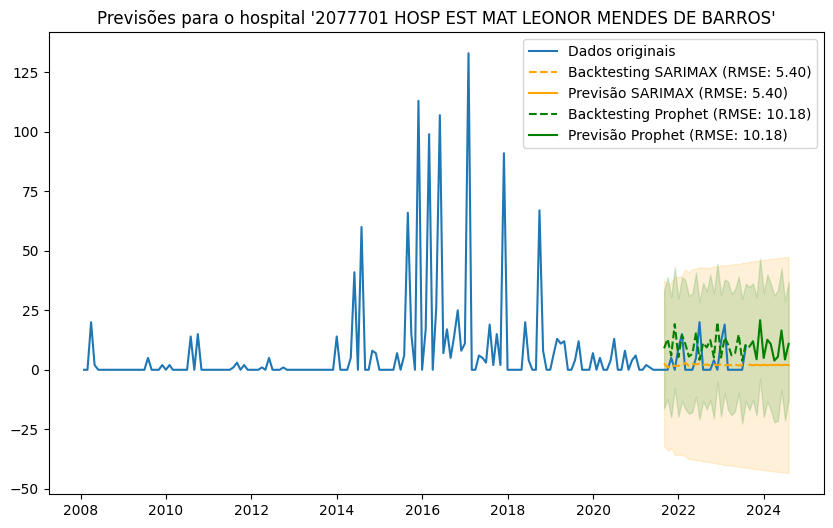

Previsão para o hospital '2066092 HOSP EST PEDREIRA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2412.999, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2412.517, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2412.940, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2758.773, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2410.581, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2412.423, Time=0.06 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2411.980, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2412.883, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2411.099, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2413.555, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=2486.793, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.634 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:42:37 - cmdstanpy - INFO - Chain [1] start processing
12:42:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 912.903670254159
RMSE do modelo Prophet: 392.5421324435668
O modelo Prophet é o melhor para este hospital.


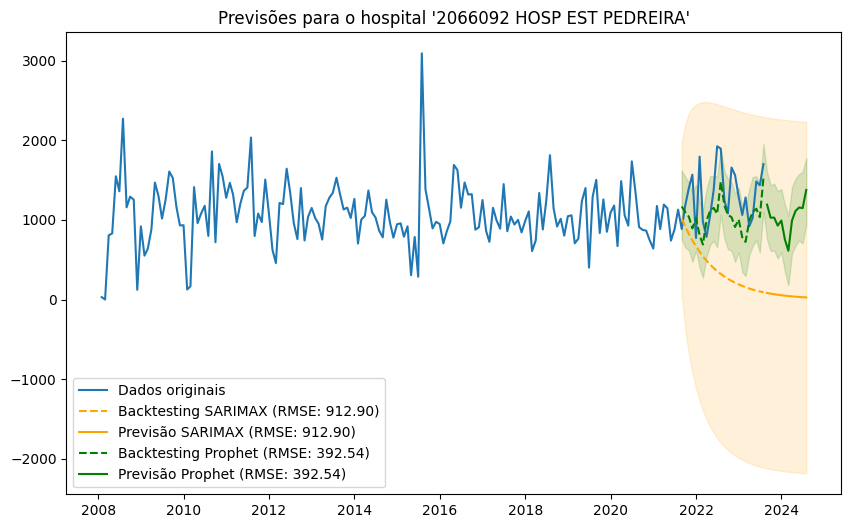

Previsão para o hospital '2091313 HOSP EST REGIONAL SUL':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2236.167, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2274.562, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2237.803, Time=0.49 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2243.223, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2558.114, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2247.875, Time=0.42 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=2241.513, Time=0.58 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=2231.549, Time=1.99 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=2232.220, Time=1.52 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=2234.028, Time=2.12 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=2234.905, Time=2.02 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=2232.744, Time=1.56 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(3,0,2)(2,0,1)[12] intercept   : AIC=2230.693, Time=2.45 sec
 ARIMA(3,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIM

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:43:13 - cmdstanpy - INFO - Chain [1] start processing
12:43:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854

RMSE do modelo SARIMAX: 185.56003446084912
RMSE do modelo Prophet: 220.64338551555733
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2077493 HOSP EST SAO MATEUS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2295.996, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2350.075, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2319.434, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2299.031, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2348.090, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2299.523, Time=0.71 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2298.397, Time=0.72 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2296.070, Time=1.96 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2295.724, Time=1.93 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2295.449, Time=1.66 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=2296.820, Time=1.52 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=2293.495, Time=1.36 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=2297.549, Time=0.64 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=2293.838, Time=9.70 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2293.238, Time=9.33

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 325.2398713831744
RMSE do modelo Prophet: 387.6666609085128
O modelo SARIMAX é o melhor para este hospital.


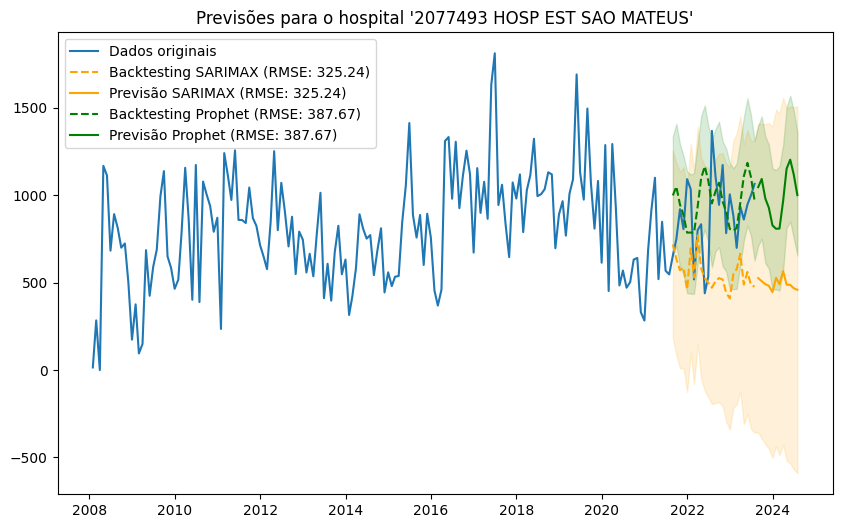

Previsão para o hospital '2091585 HOSP EST SAPOPEMBA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=12.92 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2234.463, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2233.974, Time=2.29 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2234.507, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2568.298, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2232.201, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2233.752, Time=1.56 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2235.751, Time=4.28 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2230.359, Time=1.15 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2232.203, Time=2.54 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2232.184, Time=3.91 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=2234.200, Time=4.61 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=2221.406, Time=1.59 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=2221.523, Time=3.08 sec
 ARIMA(3,0,0)(0,0,1)[12] intercept   : AIC=2221.738, Time=2.14 sec

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 95.97428514253092
RMSE do modelo Prophet: 266.5077293789928
O modelo SARIMAX é o melhor para este hospital.


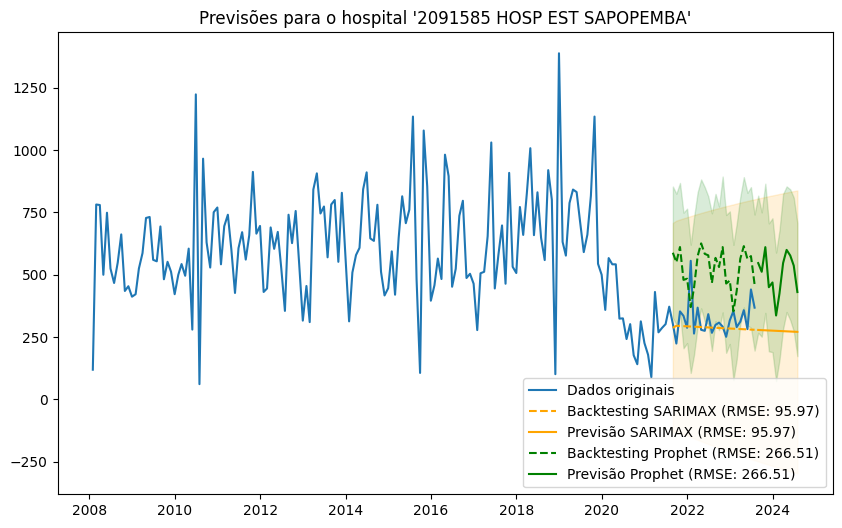

Previsão para o hospital '2082225 HOSP EST TAIPAS - KATIA DE S RODRIGUES':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=15.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2396.353, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2358.687, Time=1.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2358.118, Time=3.01 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2394.357, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2356.812, Time=1.91 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2357.593, Time=3.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2347.838, Time=6.92 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2342.998, Time=8.46 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2341.128, Time=7.30 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2396.342, Time=0.87 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2339.227, Time=10.30 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2360.276, Time=3.83 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=2341.204, Time=12.15 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2343.282, Time=9.75 s

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:53:21 - cmdstanpy - INFO - Chain [1] start processing
12:53:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\

RMSE do modelo SARIMAX: 161.39953879368665
RMSE do modelo Prophet: 252.27398632681198
O modelo SARIMAX é o melhor para este hospital.


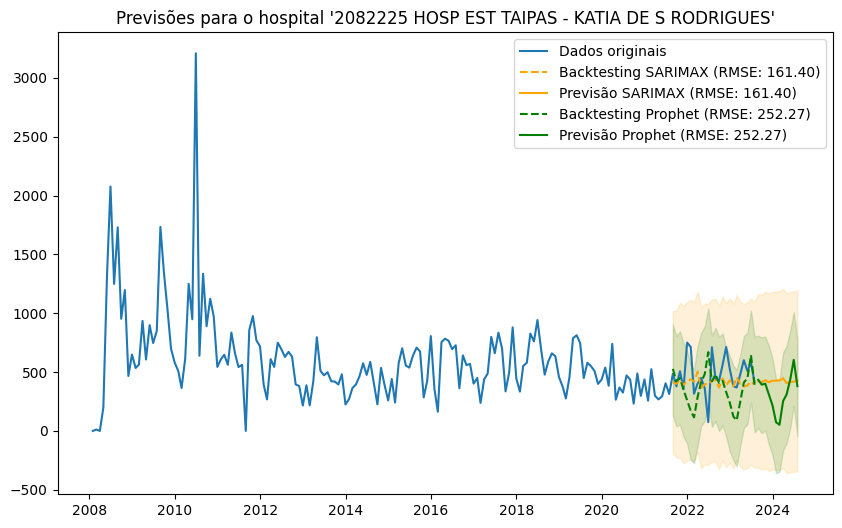

Previsão para o hospital '2088576 HOSP EST TRANSPLANT EURYCLIDES DE JESUS ZERBINI':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=14.05 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1961.783, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1904.594, Time=4.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1864.755, Time=2.98 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1959.788, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1863.238, Time=1.77 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1864.806, Time=3.26 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1866.518, Time=4.69 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1863.872, Time=3.05 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1863.962, Time=2.89 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1902.639, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1865.710, Time=6.05 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1863.138, Time=0.92 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1864.617, Time=2.01 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1864.558, Time=1.92 sec

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:54:25 - cmdstanpy - INFO - Chain [1] start processing
12:54:25 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 30.97058333457455
RMSE do modelo Prophet: 35.37537930972226
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2077426 HOSP EST VL ALPINA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=12.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2383.316, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2342.167, Time=3.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2313.577, Time=3.88 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2381.330, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2326.849, Time=1.94 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2306.386, Time=5.15 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2308.127, Time=3.82 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2308.174, Time=8.07 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2308.058, Time=8.70 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2308.895, Time=6.50 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2306.273, Time=5.86 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2375.859, Time=3.39 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2305.746, Time=8.58 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2308.547, Time=5.85 sec

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
12:58:12 - cmdstanpy - INFO - Chain [1] start processing
12:58:12 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 233.80615559561707
RMSE do modelo Prophet: 259.26713404575696
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2688573 HOSP EST VL NOVA CACHOEIRINHA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=13.73 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2344.596, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2305.061, Time=2.72 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2304.841, Time=3.97 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2342.605, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2321.354, Time=2.17 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2272.554, Time=8.46 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2294.359, Time=3.79 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2274.505, Time=8.65 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2274.495, Time=13.27 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2300.741, Time=6.69 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2285.471, Time=7.49 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=12.39 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2334.897, Time=5.86 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=12.41 sec
 ARIMA

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
13:01:40 - cmdstanpy - INFO - Chain [1] start processing
13:01:40 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 485.36833868547035
RMSE do modelo Prophet: 408.57907134546775
O modelo Prophet é o melhor para este hospital.


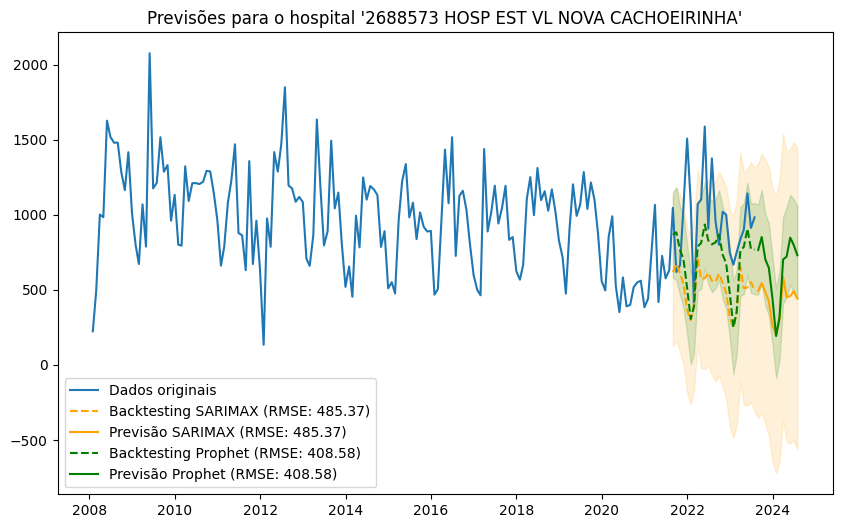

Previsão para o hospital '2091755 HOSP EST VL PENTEADO - DR JOSE PANGELLA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=16.11 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2233.068, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2216.742, Time=5.60 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2220.715, Time=2.89 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2538.128, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2216.706, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2216.743, Time=1.14 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2218.740, Time=5.59 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2215.927, Time=1.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2216.657, Time=2.23 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2216.040, Time=1.07 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=2218.033, Time=5.93 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=2217.767, Time=1.60 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2217.808, Time=2.35 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2217.530, Time=0.99 sec

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
13:02:32 - cmdstanpy - INFO - Chain [1] start processing
13:02:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 349.37380589461424
RMSE do modelo Prophet: 264.0195718578347
O modelo Prophet é o melhor para este hospital.


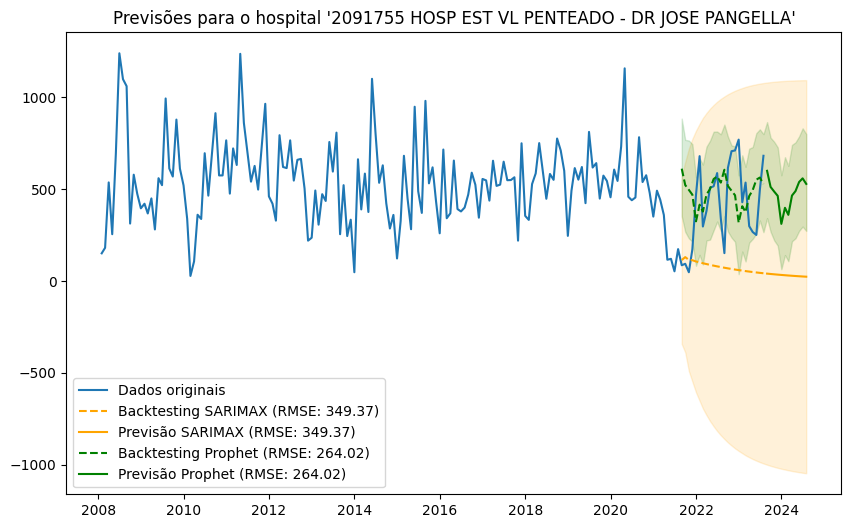

Previsão para o hospital '2077752 HOSP MONUMENTO-CEHM':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=12.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1001.575, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=921.998, Time=1.75 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=883.297, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=999.577, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=881.338, Time=1.24 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=883.296, Time=2.23 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=7.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=876.054, Time=2.14 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=878.019, Time=2.51 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=878.018, Time=2.28 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=8.80 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=920.088, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=877.201, Time=2.67 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=877.460, Time=2.60 sec
 ARIMA(0,1,2)(0,0,0)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 0.40002030476084016
RMSE do modelo Prophet: 2.845158892030669
O modelo SARIMAX é o melhor para este hospital.


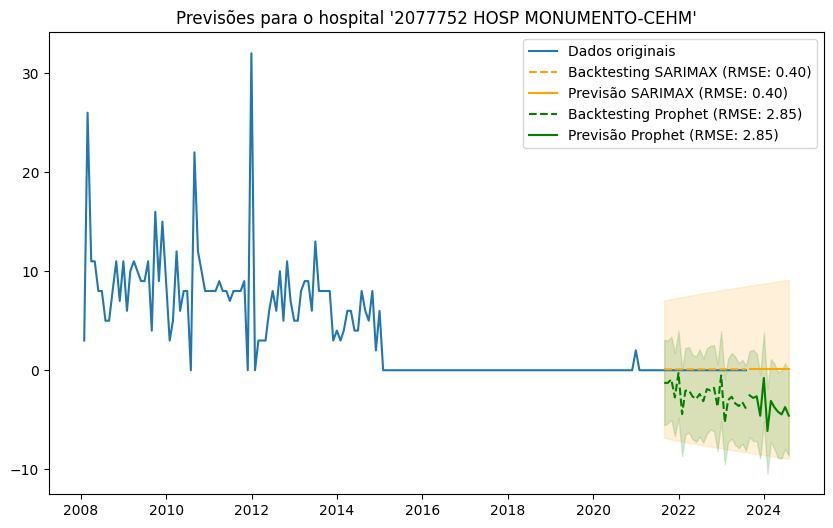

Previsão para o hospital '2752077 HOSP DO SERV PUB MUNICIPAL - HSPM':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1942.553, Time=12.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2024.798, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1978.256, Time=2.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1937.144, Time=3.78 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2022.799, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1935.724, Time=1.84 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1937.090, Time=2.83 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1939.044, Time=5.63 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1936.933, Time=3.27 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1936.785, Time=3.70 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1978.797, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1937.748, Time=5.37 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1933.817, Time=1.13 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1935.205, Time=2.34 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1935.259, Time=2.3

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
13:04:35 - cmdstanpy - INFO - Chain [1] start processing
13:04:35 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 47.62723560546026
RMSE do modelo Prophet: 84.17684265577415
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2084473 HOSP MUN IGNACIO PROENCA DE GOUVEA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=14.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2214.604, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2163.333, Time=2.91 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=3.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2212.604, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2161.504, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2163.293, Time=2.68 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2164.665, Time=5.99 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2148.452, Time=2.48 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2150.160, Time=3.58 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=2150.126, Time=3.19 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=2151.926, Time=12.05 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=2145.492, Time=4.70 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=2147.041, Time=3.99 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=2146.975, Time=4.21 sec
 AR

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
13:10:22 - cmdstanpy - INFO - Chain [1] start processing
13:10:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 178.26982843092938
RMSE do modelo Prophet: 213.30865294475626
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2084139 HOSP MUN BENEDICTO MONTENEGRO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=13.30 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1889.282, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1887.516, Time=5.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1888.530, Time=3.58 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2180.955, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1886.575, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1887.765, Time=2.58 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1889.329, Time=8.45 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1886.759, Time=2.41 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1887.386, Time=5.21 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1887.464, Time=1.87 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1888.756, Time=3.71 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=1962.238, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 46.267 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
13:11:09 - cmdstanpy - INFO - Chain [1] start processing
13:11:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 139.3972303693663
RMSE do modelo Prophet: 120.06710904380006
O modelo Prophet é o melhor para este hospital.


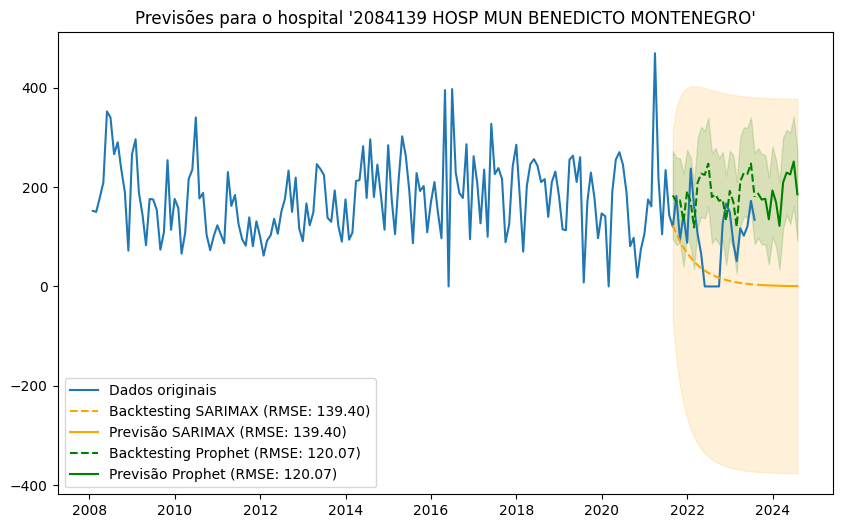

Previsão para o hospital '0102105 HOSP MUN BRASILANDIA - ADIB JATENE':
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3451.640, Time=0.04 sec
Total fit time: 0.043 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = p

RMSE do modelo SARIMAX: 0.0
RMSE do modelo Prophet: 0.0
O modelo Prophet é o melhor para este hospital.


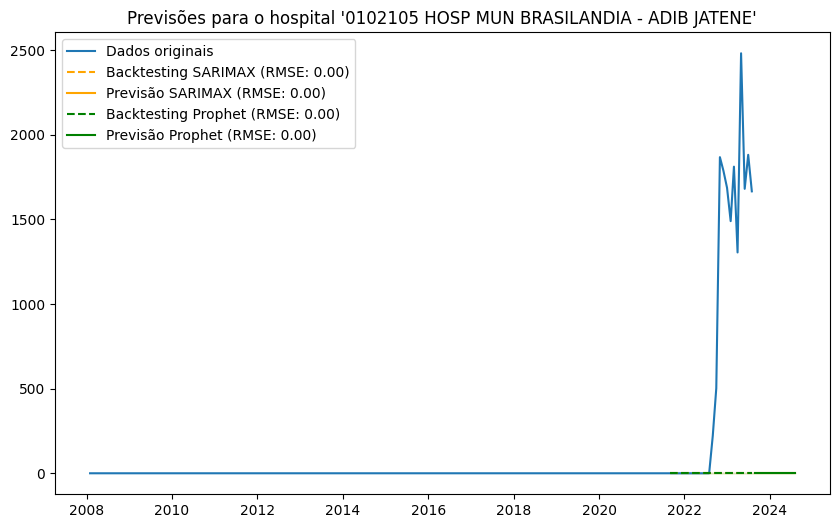

Previsão para o hospital '0158100 HOSP MUN BRIGADEIRO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=769.636, Time=9.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=758.740, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=762.731, Time=1.50 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=762.730, Time=1.89 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=758.018, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=760.739, Time=0.85 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=760.739, Time=0.68 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=762.739, Time=0.81 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=760.731, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=760.731, Time=0.91 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
13:11:30 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=762.730, Time=2.52 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 18.763 seconds


13:11:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 290.2365414623045
RMSE do modelo Prophet: 290.83836026893243
O modelo SARIMAX é o melhor para este hospital.


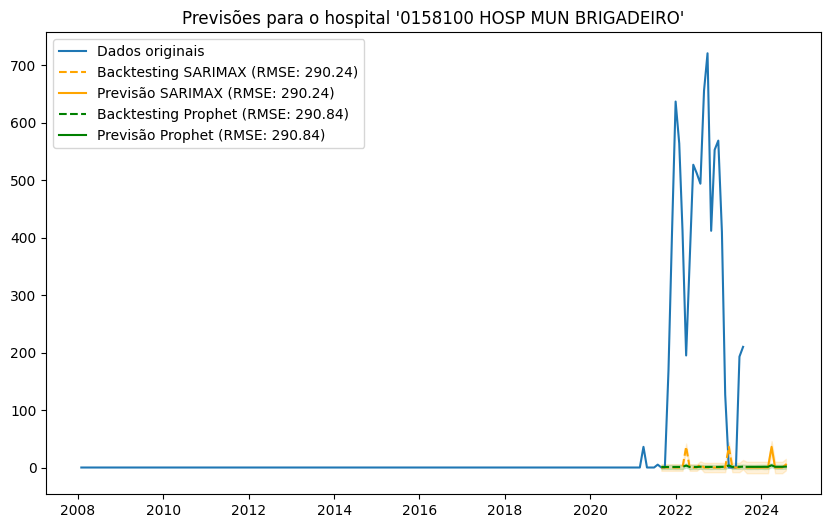

Previsão para o hospital '2079186 HOSP MUN CACHOEIRINHA-MARIO DE M A SILVA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=11.94 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1361.932, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1365.419, Time=2.58 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1365.428, Time=2.94 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1376.307, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1363.492, Time=2.09 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1363.477, Time=1.30 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=7.85 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1363.789, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1363.831, Time=2.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1359.225, Time=3.01 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1361.074, Time=3.89 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1361.073, Time=4.72 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=8.81 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1354.935, Time=3.57 sec
 ARIMA(2,

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
13:43:42 - cmdstanpy - INFO - Chain [1] start processing
13:43:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 3.6711778413496416
RMSE do modelo Prophet: 7.138846761662599
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2786680 HOSP MUN CAMPO LIMPO - FERNANDO M P DA ROCHA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2387.371, Time=13.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2447.766, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2417.882, Time=1.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2402.014, Time=4.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2445.769, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=12.32 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=11.21 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=16.24 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=16.82 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=11.23 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2393.534, Time=3481.97 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=19.39 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=17.77 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=12.74 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2396.473, Time=12.62 sec
 ARIMA(3,1,2)(1,0,1)[1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:45:10 - cmdstanpy - INFO - Chain [1] start processing
14:45:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 410.59197746807195
RMSE do modelo Prophet: 428.67751873080874
O modelo SARIMAX é o melhor para este hospital.


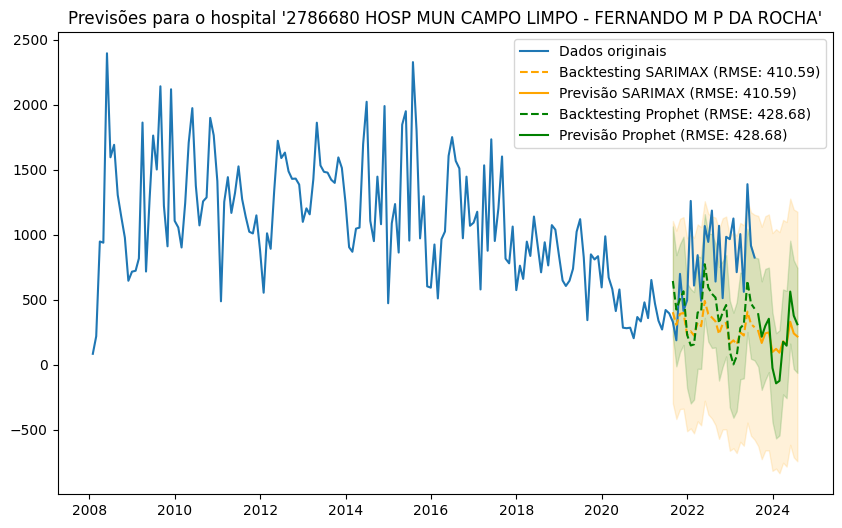

Previsão para o hospital '7992890 HOSP MUN CAPELA DO SOCORRO':
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3451.640, Time=0.03 sec
Total fit time: 0.028 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = p

RMSE do modelo SARIMAX: 0.0
RMSE do modelo Prophet: 0.0
O modelo Prophet é o melhor para este hospital.


Previsão para o hospital '5420938 HOSP MUN CIDADE TIRADENTES-CARMEN PRUDENTE':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2310.721, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2423.361, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2365.501, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2321.718, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2421.366, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2320.284, Time=0.63 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2318.616, Time=0.68 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2312.726, Time=2.08 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2313.723, Time=1.99 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2326.903, Time=0.28 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2321.961, Time=1.54 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2318.407, Time=1.84 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.55 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2309.614, Time=0.82 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2319.297, Time=0.59 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:45:54 - cmdstanpy - INFO - Chain [1] start processing
14:45:54 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 351.4287401696727
RMSE do modelo Prophet: 379.6296662567428
O modelo SARIMAX é o melhor para este hospital.


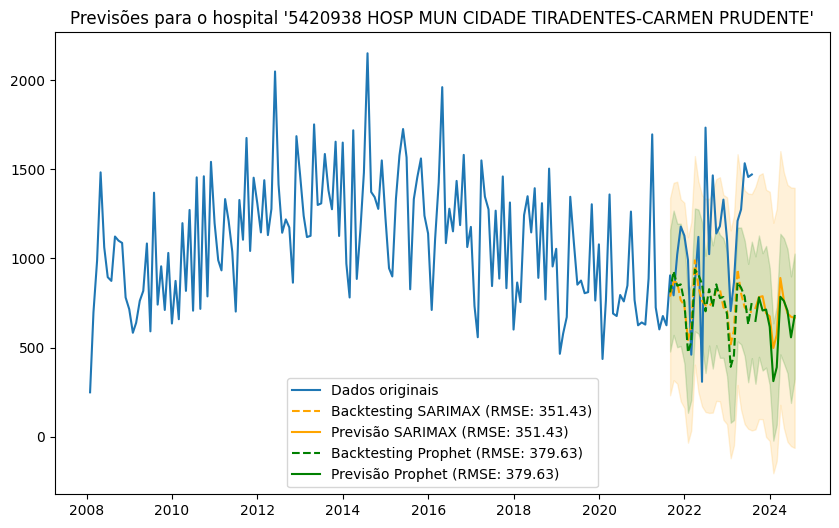

Previsão para o hospital '0102075 HOSP MUN DA BELA VISTA - SANTA DULCE DOS POBRES':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1634.844, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1694.399, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1636.278, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1636.488, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1692.445, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1632.844, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1630.942, Time=0.19 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1632.844, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1631.744, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1631.724, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=1623.610, Time=0.28 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=1624.711, Time=0.62 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=1624.704, Time=0.63 sec
 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=1626.702, Time=0.89 sec
 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=1626.398, Time=0.16

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:46:10 - cmdstanpy - INFO - Chain [1] start processing
14:46:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\

RMSE do modelo SARIMAX: 359.79701651696394
RMSE do modelo Prophet: 319.1442426764292
O modelo Prophet é o melhor para este hospital.


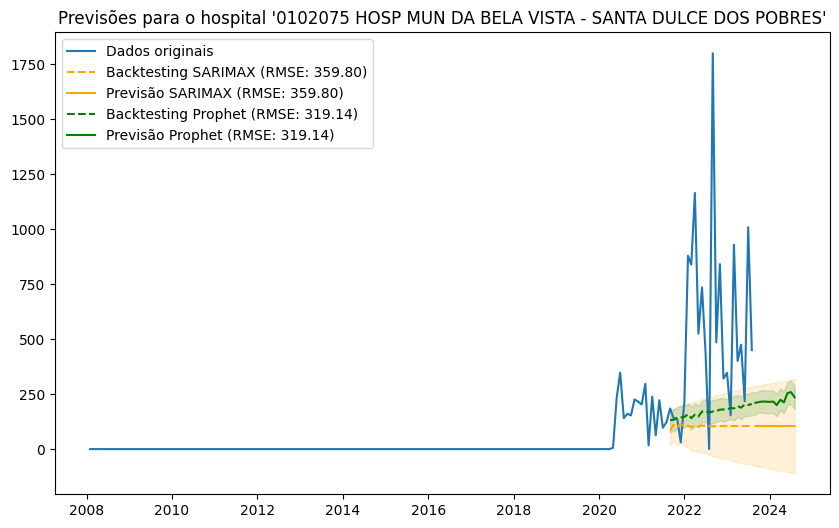

Previsão para o hospital '2082829 HOSP MUN ERMELINO MATARAZZO - ALIPIO CORREA NETTO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2259.570, Time=1.20 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2350.624, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2267.371, Time=0.74 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2302.227, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2678.842, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2257.270, Time=0.65 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2257.036, Time=0.13 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=2257.791, Time=0.70 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=2258.100, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2255.724, Time=0.24 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=2257.130, Time=0.68 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=2257.949, Time=0.13 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=2258.896, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2253.994, Time=0.17 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=2254.711, Time=0.54

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:46:18 - cmdstanpy - INFO - Chain [1] start processing
14:46:18 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 354.2293195069324
RMSE do modelo Prophet: 354.93598046233086
O modelo SARIMAX é o melhor para este hospital.


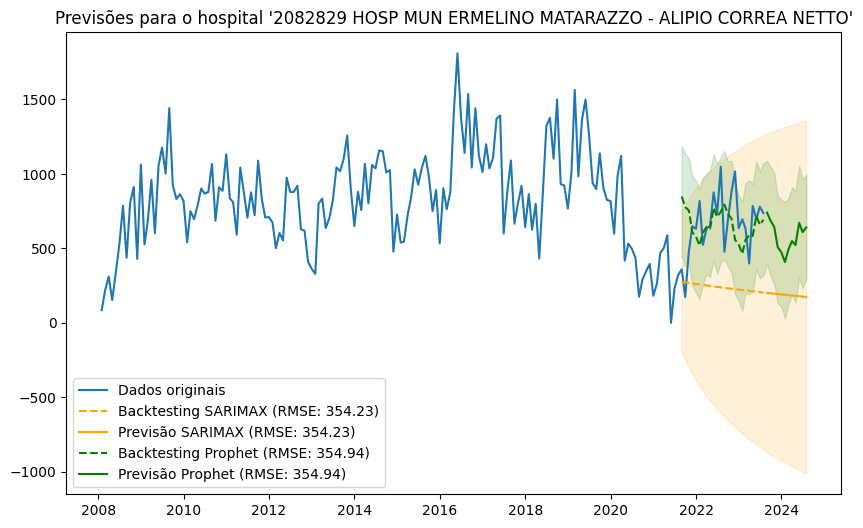

Previsão para o hospital '7711980 HOSP MUN GILSON DE CASSIA M DE CARVALHO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1997.391, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1973.629, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1961.296, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1995.406, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1959.438, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1961.313, Time=0.21 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1963.224, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1959.572, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1959.919, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1972.103, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1961.501, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1957.662, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1959.527, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1959.509, Time=0.12 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:46:22 - cmdstanpy - INFO - Chain [1] start processing
14:46:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 130.95681340798302
RMSE do modelo Prophet: 152.77701010884505
O modelo SARIMAX é o melhor para este hospital.


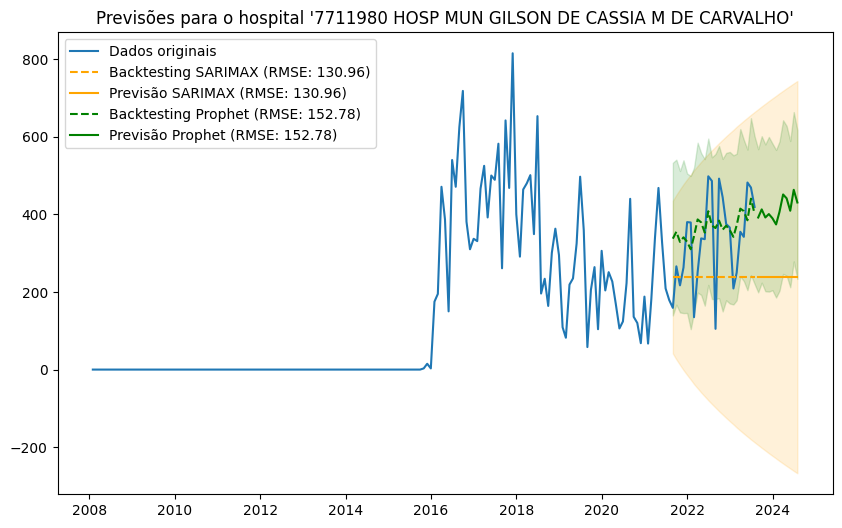

Previsão para o hospital '0161438 HOSP MUN GUARAPIRANGA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=2.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1745.300, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1737.656, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1721.854, Time=0.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1719.854, Time=0.06 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1721.854, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1723.854, Time=0.25 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1721.358, Time=0.08 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1719.940, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1735.656, Time=0.05 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1715.711, Time=0.43 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1717.708, Time=0.88 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1717.708, Time=1.19 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1719.709, Time=2.02 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1689.620, Time=0.63 sec


c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:46:37 - cmdstanpy - INFO - Chain [1] start processing
14:46:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854

RMSE do modelo SARIMAX: 1075.7622048913515
RMSE do modelo Prophet: 613.3018284539216
O modelo Prophet é o melhor para este hospital.


Previsão para o hospital '2078325 HOSP MUN INF MENINO JESUS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2239.469, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2213.253, Time=0.73 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2210.702, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2512.965, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2226.388, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2212.496, Time=0.36 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=2211.746, Time=0.38 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=2214.486, Time=0.32 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2213.724, Time=0.71 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=2219.380, Time=0.15 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2211.227, Time=0.22 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=2211.881, Time=0.19 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2209.373, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2225.186, Time=0.02 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:46:45 - cmdstanpy - INFO - Chain [1] start processing
14:46:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 562.8424684457342
RMSE do modelo Prophet: 313.64968240520284
O modelo Prophet é o melhor para este hospital.


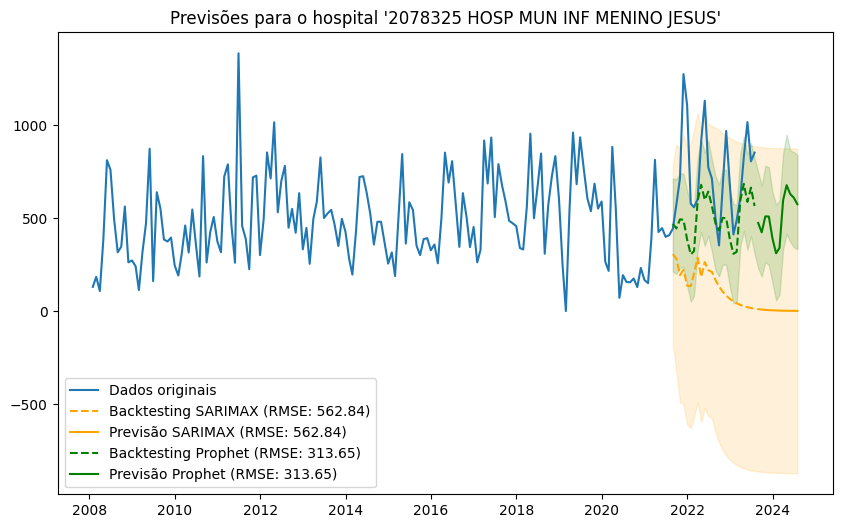

Previsão para o hospital '2077639 HOSP MUN ITAQUERA - WALDOMIRO DE PAULA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2288.756, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2250.192, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2211.428, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2286.764, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2215.956, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2211.885, Time=1.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2209.616, Time=0.55 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2208.122, Time=0.60 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2287.524, Time=0.56 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2209.763, Time=0.74 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=2209.741, Time=0.81 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2250.688, Time=0.38 sec
 ARIMA(1,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:47:00 - cmdstanpy - INFO - Chain [1] start processing
14:47:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 277.3625661869413
RMSE do modelo Prophet: 313.1053393956001
O modelo SARIMAX é o melhor para este hospital.


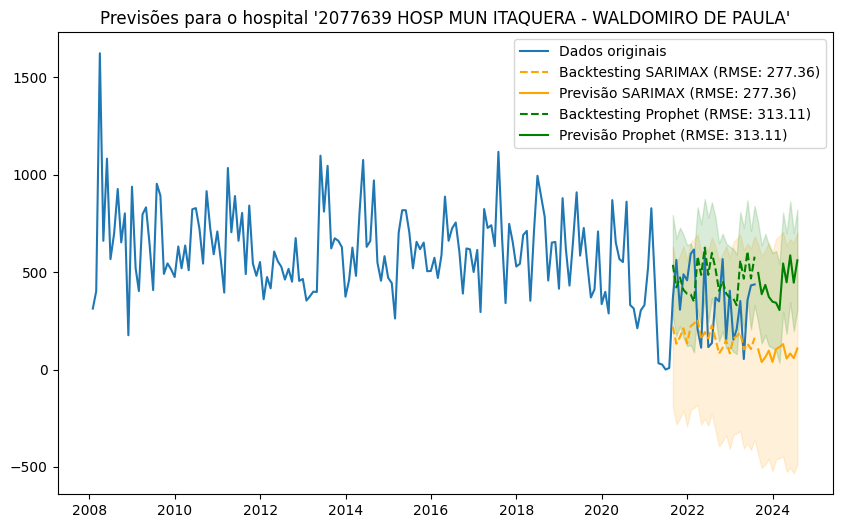

Previsão para o hospital '2081970 HOSP MUN JABAQUARA - ARTUR RIBEIRO DE SABOYA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2230.437, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2317.631, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2252.906, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2233.145, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2315.653, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.45 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2246.033, Time=0.42 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.41 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2227.212, Time=0.80 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2236.174, Time=0.41 sec
 ARIMA(1,1,2)(1,0,0)[12] inter

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:48:11 - cmdstanpy - INFO - Chain [1] start processing
14:48:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 147.10916185958988
RMSE do modelo Prophet: 202.3427956779188
O modelo SARIMAX é o melhor para este hospital.


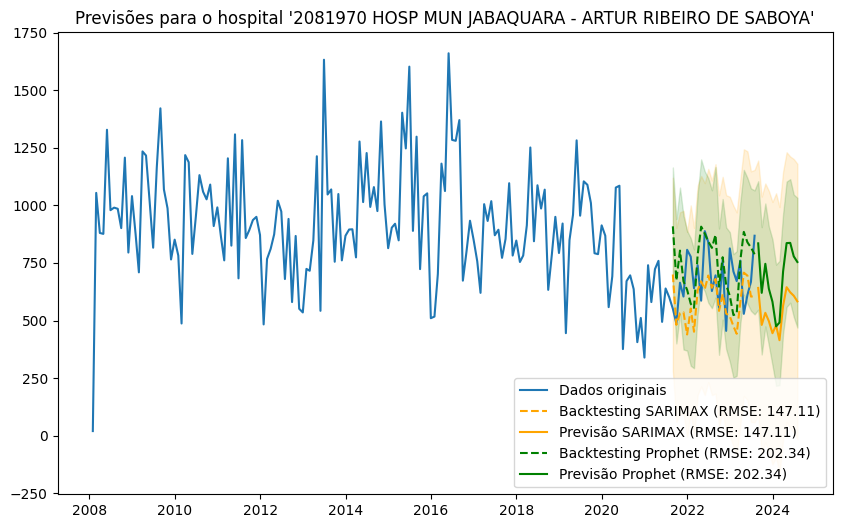

Previsão para o hospital '9465464 HOSP MUN JOSANIAS CASTANHA BRAGA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1887.379, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1891.179, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1890.928, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1885.406, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1889.230, Time=0.08 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1889.230, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1891.230, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1889.322, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1889.050, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1878.836, Time=0.19 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1880.760, Time=0.28 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1880.759, Time=0.39 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1882.759, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1860.791, Time=0.12 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:48:19 - cmdstanpy - INFO - Chain [1] start processing
14:48:19 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 302.63165857669026
RMSE do modelo Prophet: 301.44834531887335
O modelo Prophet é o melhor para este hospital.


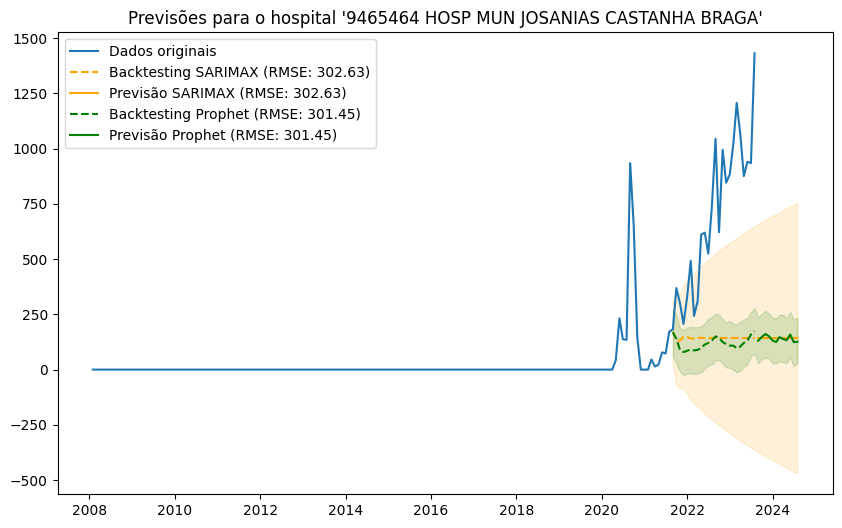

Previsão para o hospital '5718368 HOSP MUN M BOI MIRIM':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2286.682, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2315.700, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2296.117, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2290.939, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2313.724, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2287.299, Time=0.45 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2287.567, Time=0.45 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2289.096, Time=0.28 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2288.922, Time=0.97 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2289.511, Time=0.85 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(3,1,2)(1,0,1)

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:48:55 - cmdstanpy - INFO - Chain [1] start processing
14:48:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 492.037298300258
RMSE do modelo Prophet: 551.1149479932365
O modelo SARIMAX é o melhor para este hospital.


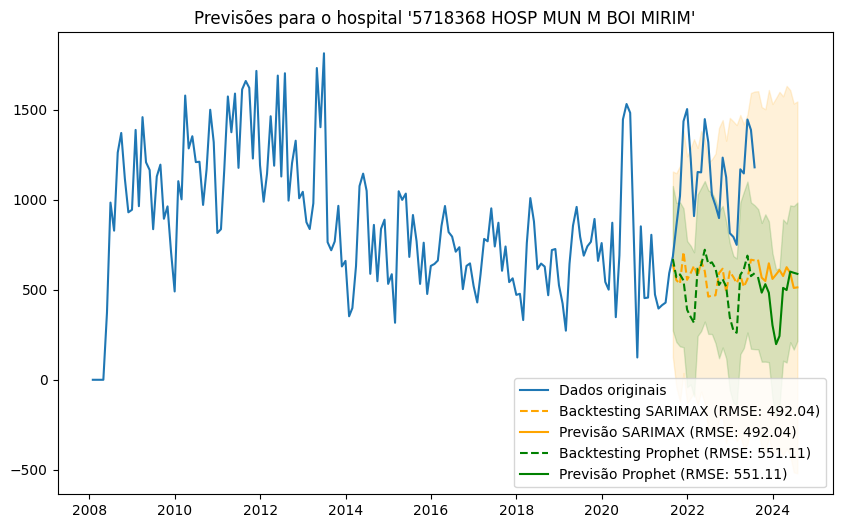

Previsão para o hospital '2075717 HOSP MUN MARIO DEGNI':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1938.453, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1942.035, Time=0.76 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1941.983, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2094.045, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1940.041, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1939.986, Time=0.15 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1941.982, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1940.452, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1940.448, Time=0.08 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:48:59 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1942.109, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.683 seconds


14:48:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 52.22666943238866
RMSE do modelo Prophet: 72.64098779746513
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2077450 HOSP MUN PIRITUBA-JOSE SOARES HUNGRIA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2186.527, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2254.411, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2200.009, Time=0.72 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2212.692, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2554.787, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2184.582, Time=0.68 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2193.501, Time=0.33 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=2186.132, Time=1.78 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=2190.153, Time=0.67 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=2188.144, Time=2.01 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=2185.082, Time=0.12 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=2186.028, Time=0.29 sec
 ARIMA(3,0,2)(0,0,1)[12] intercept   : AIC=2186.769, Time=0.42 sec
 ARIMA(2,0,3)(0,0,1)[12] intercept   : AIC=2186.355, Time=0.73 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2185.991, Time=0.54

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:49:16 - cmdstanpy - INFO - Chain [1] start processing
14:49:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 303.570045944777
RMSE do modelo Prophet: 303.199293235551
O modelo Prophet é o melhor para este hospital.


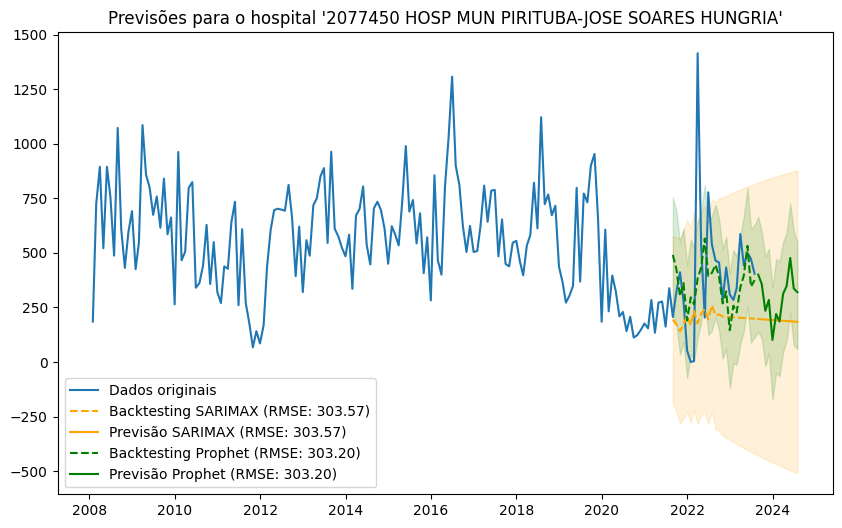

Previsão para o hospital '6998194 HOSP MUN SOROCABANA':
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3451.640, Time=0.03 sec
Total fit time: 0.030 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = p

RMSE do modelo SARIMAX: 107.59162761727018
RMSE do modelo Prophet: 107.59162761727018
O modelo Prophet é o melhor para este hospital.


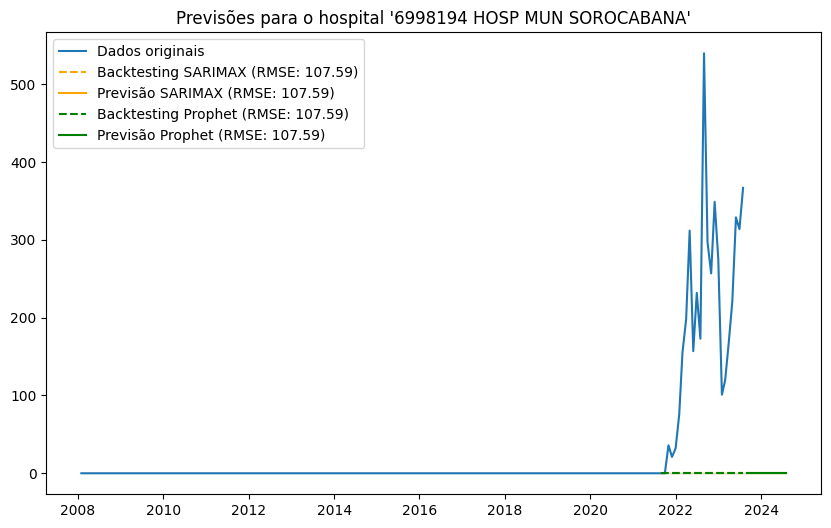

Previsão para o hospital '2080346 HOSP MUN TATUAPE - CARMINO CARICCHIO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2363.690, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2417.198, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2385.842, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2386.127, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2415.208, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2371.159, Time=0.71 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2369.962, Time=0.70 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2364.697, Time=2.14 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2362.816, Time=1.95 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2362.306, Time=1.69 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=2365.966, Time=1.95 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=2365.196, Time=1.95 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=2366.113, Time=1.66 sec
 ARIM

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:50:04 - cmdstanpy - INFO - Chain [1] start processing
14:50:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\

RMSE do modelo SARIMAX: 330.7842370857004
RMSE do modelo Prophet: 386.0682236813906
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2080583 HOSP MUN TIDE SETUBAL':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2198.907, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2265.219, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2220.550, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2197.703, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2263.219, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2196.847, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2197.659, Time=0.24 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2197.767, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2197.324, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2197.729, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2219.097, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2195.265, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2196.020, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=2196.067, Time=0.13 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:50:09 - cmdstanpy - INFO - Chain [1] start processing
14:50:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 244.6819079369826
RMSE do modelo Prophet: 270.92096157766366
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '3212130 HOSP MUN VL MARIA - VER JOSE STOROPOLLI':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2218.528, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2278.429, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2246.920, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2225.421, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2276.439, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2219.955, Time=1.95 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2220.077, Time=2.04 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2220.992, Time=1.62 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=2222.136, Time=2.22 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2217.185, Time=0.67 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,2)(1,0,0)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:50:58 - cmdstanpy - INFO - Chain [1] start processing
14:50:58 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 200.12988366579194
RMSE do modelo Prophet: 222.95890951451784
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2080788 HOSP MUN VL NHOCUNE-ALEXANDRE ZAIO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1946.477, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2002.394, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1965.869, Time=0.56 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1949.733, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2000.394, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1950.922, Time=0.73 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1949.473, Time=0.93 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1948.472, Time=2.24 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1948.475, Time=2.10 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1954.044, Time=0.46 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1952.091, Time=1.83 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1949.850, Time=1.65 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(3,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:51:39 - cmdstanpy - INFO - Chain [1] start processing
14:51:39 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 150.45969399996687
RMSE do modelo Prophet: 112.39856070370597
O modelo Prophet é o melhor para este hospital.


Previsão para o hospital '2091399 HOSP N SRA DO PARI':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=545.826, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=533.970, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=537.908, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=537.906, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=534.291, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=535.943, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=535.942, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=535.937, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=535.936, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=537.865, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.700 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:51:42 - cmdstanpy - INFO - Chain [1] start processing
14:51:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 0.8416254115301732
RMSE do modelo Prophet: 1.1310202024862797
O modelo SARIMAX é o melhor para este hospital.


Previsão para o hospital '2089777 HOSP NIPO BRASILEIRO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-141.791, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-137.971, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-137.979, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-139.741, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-139.902, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-139.909, Time=0.07 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-139.895, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-139.899, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-137.901, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.512 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:51:45 - cmdstanpy - INFO - Chain [1] start processing
14:51:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 0.0
RMSE do modelo Prophet: 0.04196350058774384
O modelo SARIMAX é o melhor para este hospital.


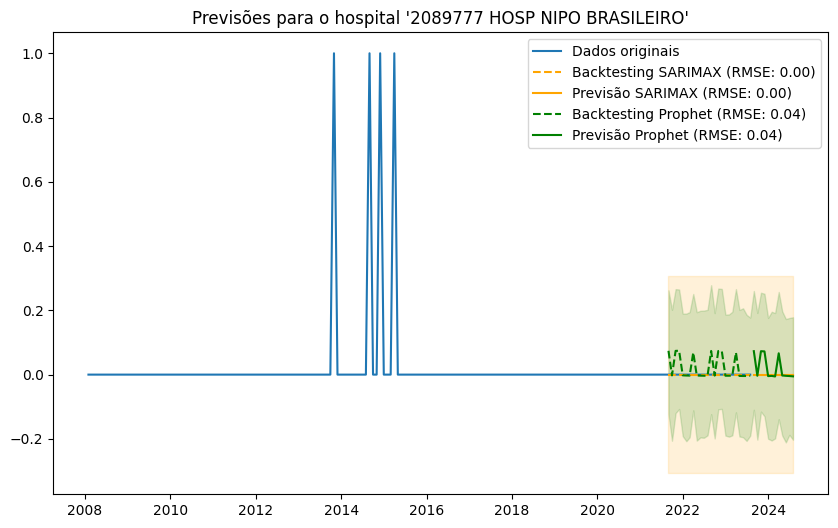

Previsão para o hospital '2077485 HOSP SAO PAULO - UNIDADE I - UNIFESP':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2409.359, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2377.409, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2339.298, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2407.379, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2339.225, Time=0.14 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2341.520, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2377.462, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2339.154, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2338.768, Time=0.16 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=2340.002, Time=0.40 sec
 ARIMA(0,1,1)(1,0,1)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:52:02 - cmdstanpy - INFO - Chain [1] start processing
14:52:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 234.6252684606851
RMSE do modelo Prophet: 236.1566339372603
O modelo SARIMAX é o melhor para este hospital.


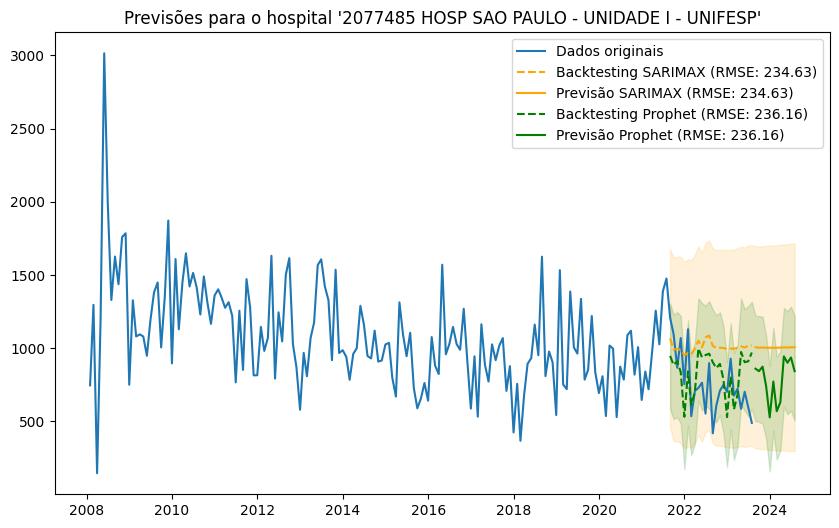

Previsão para o hospital '2058502 HOSP SERV ESTADUAL FCO MORATO DE OLIVEIRA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=482.941, Time=1.34 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=471.463, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=475.450, Time=0.37 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=475.450, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=470.466, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=473.456, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=473.456, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=475.456, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=473.457, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=473.457, Time=0.03 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:52:05 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.32 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 2.389 seconds


14:52:05 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 0.0
RMSE do modelo Prophet: 0.17427359625702682
O modelo SARIMAX é o melhor para este hospital.


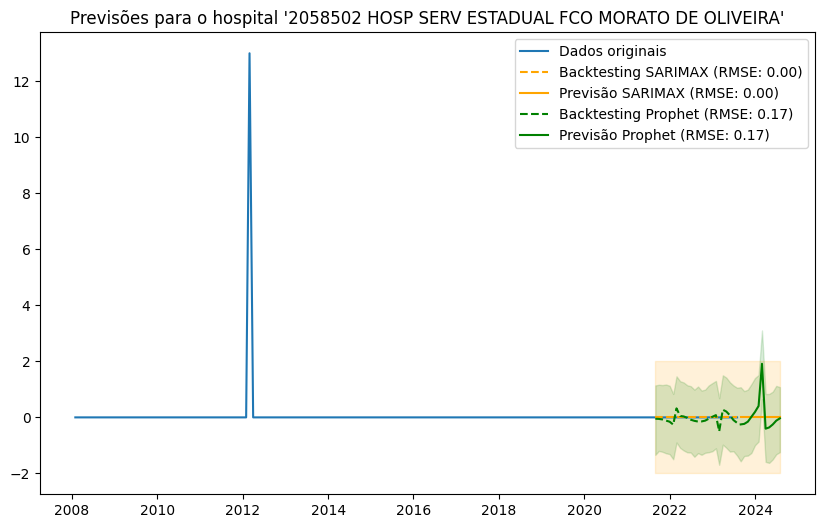

Previsão para o hospital '2077477 HOSP STA MARCELINA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2305.856, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2282.376, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2282.867, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2303.857, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2290.570, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2268.442, Time=0.43 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2261.441, Time=1.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2262.391, Time=0.80 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=2263.504, Time=1.62 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2261.420, Time=1.10 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2277.980, Time=0.71 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2286.398, Time=0.07 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=2296.918, Time=0.70 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=2262.457, Time=1.19 sec


c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_ra

RMSE do modelo SARIMAX: 513.6776878962966
RMSE do modelo Prophet: 558.6123099611991
O modelo SARIMAX é o melhor para este hospital.


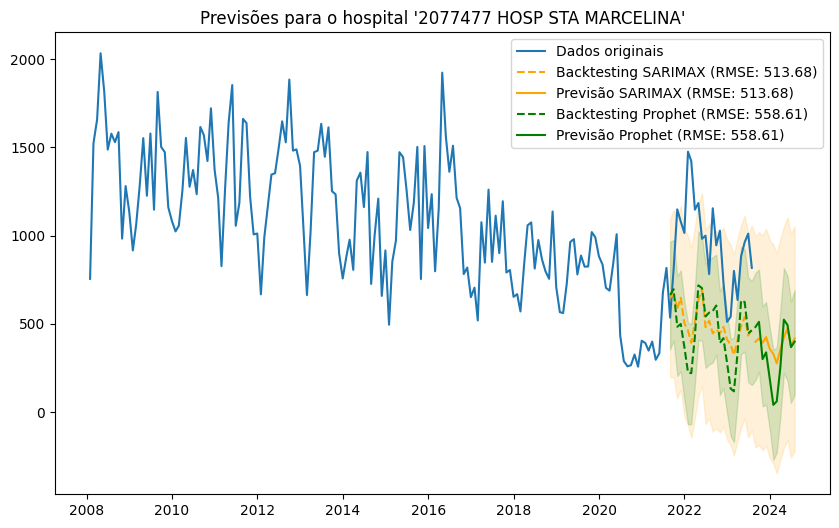

Previsão para o hospital '2076926 HOSP UNIVERSITARIO - HU/USP':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2277.482, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2346.777, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2316.950, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2288.553, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2344.796, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2283.206, Time=0.80 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2277.954, Time=2.13 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2278.483, Time=2.00 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2289.825, Time=0.41 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2284.552, Time=1.70 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2274.963, Time=2.09 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2272.624, Time=1.24 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2282.051, Time=0.93 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=2271.718, Time=1.88 sec


c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:54:06 - cmdstanpy - INFO - Chain [1] start processing
14:54:07 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 201.425945856633
RMSE do modelo Prophet: 204.36488992640966
O modelo SARIMAX é o melhor para este hospital.


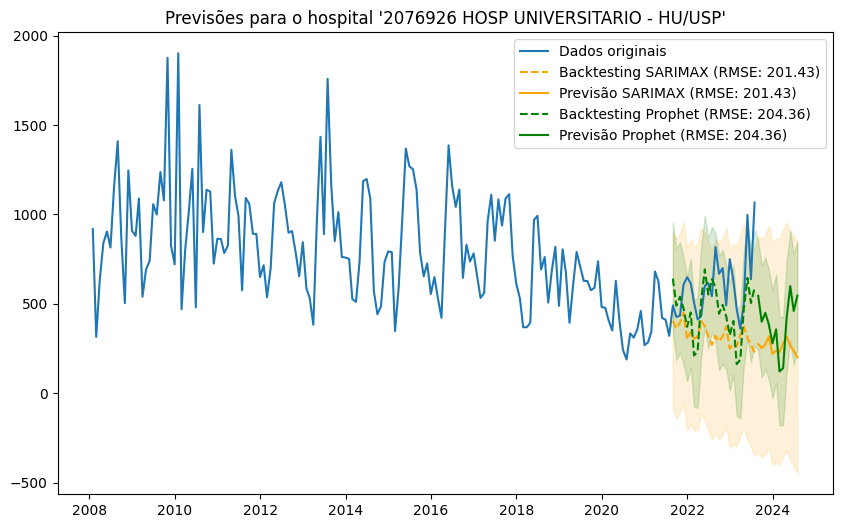

Previsão para o hospital '2077388 HOSPITAL AMPARO MATERNAL':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1357.824, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1488.017, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1364.505, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1378.909, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1486.017, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1355.896, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1353.942, Time=0.21 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1355.894, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1363.251, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1359.037, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=1328.076, Time=0.28 sec
 ARIMA(2,1,3)(1,0,0)[12] intercept   : AIC=1329.904, Time=0.51 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=1329.894, Time=0.55 sec
 ARIMA(2,1,3)(1,0,1)[12] intercept   : AIC=1331.819, Time=0.92 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:54:19 - cmdstanpy - INFO - Chain [1] start processing
14:54:19 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 13.61554833343618
RMSE do modelo Prophet: 16.4662771243647
O modelo SARIMAX é o melhor para este hospital.


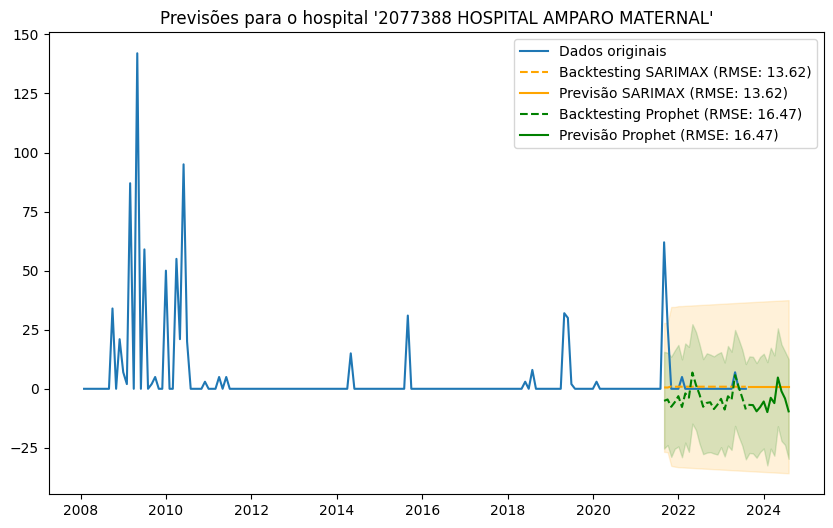

Previsão para o hospital '2089785 HOSPITAL DO RIM E HIPERTENSAO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1844.799, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1830.945, Time=0.48 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1822.568, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1842.803, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1821.297, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1822.601, Time=0.21 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1818.178, Time=0.09 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1819.563, Time=0.28 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1819.542, Time=0.41 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1829.379, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1823.760, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1820.252, Time=0.15 sec
 ARIMA(0,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:54:26 - cmdstanpy - INFO - Chain [1] start processing
14:54:26 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 50.89432898560852
RMSE do modelo Prophet: 82.66350313014594
O modelo SARIMAX é o melhor para este hospital.


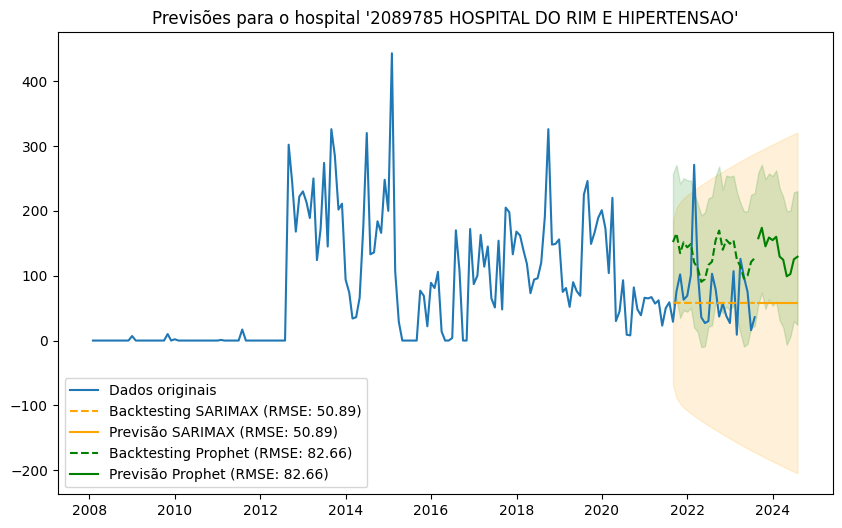

Previsão para o hospital '2089696 HOSPITAL GRAACC INSTITUTO DE ONCOLOGIA PEDIATRICA IOP':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1707.660, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1667.903, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1705.660, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1666.189, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1667.897, Time=0.12 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1669.897, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1656.038, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1657.757, Time=0.21 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1657.703, Time=0.14 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1659.606, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=1632.267, Time=0.09 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=1634.232, Time=0.23 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=1634.220, Time=0.19 sec
 ARIM

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:54:42 - cmdstanpy - INFO - Chain [1] start processing
14:54:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 54.18510405382844
RMSE do modelo Prophet: 45.09342094613961
O modelo Prophet é o melhor para este hospital.


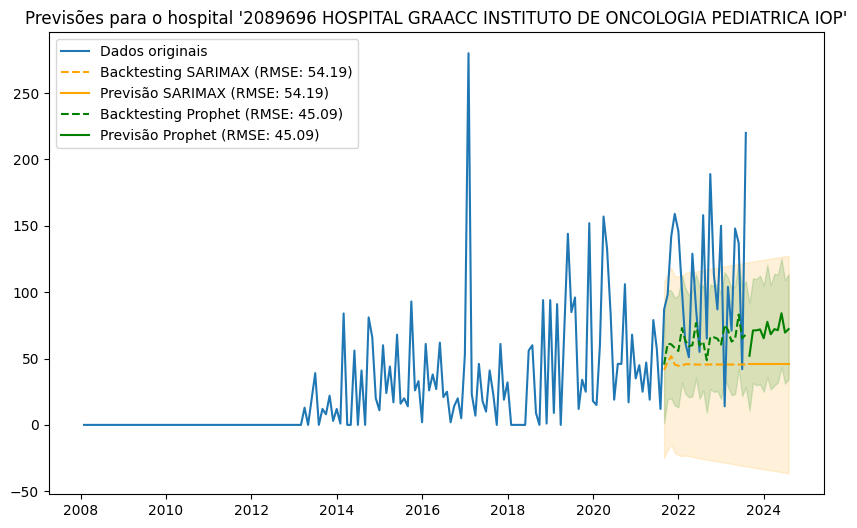

Previsão para o hospital '2058391 HOSPITAL ISRAELITA ALBERT EINSTEIN':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1673.808, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1638.169, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1611.027, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1671.808, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1609.169, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1611.076, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1609.045, Time=0.09 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1610.911, Time=0.21 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1610.844, Time=0.17 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1636.465, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1609.966, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1611.399, Time=0.18 sec
 ARIMA(0,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:54:48 - cmdstanpy - INFO - Chain [1] start processing
14:54:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 0.04546568807139146
RMSE do modelo Prophet: 11.72602924582295
O modelo SARIMAX é o melhor para este hospital.


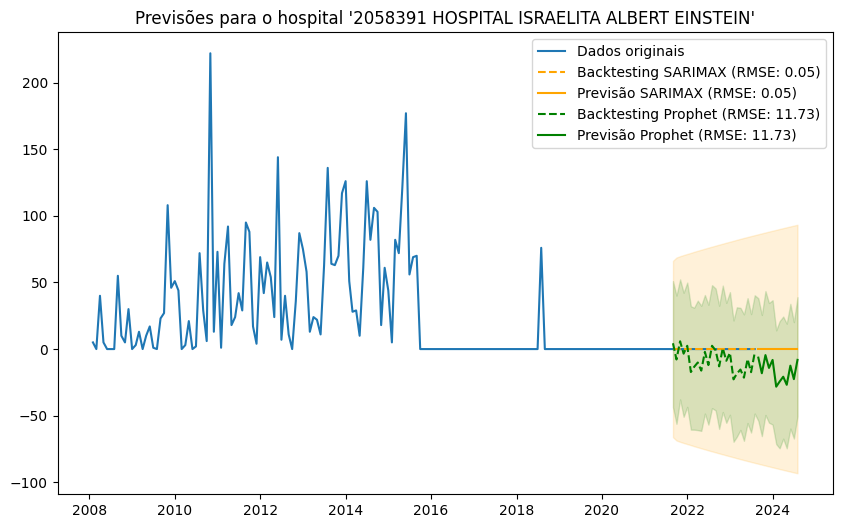

Previsão para o hospital '2082624 HOSPITAL JAPONES SANTA CRUZ':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=456.880, Time=1.24 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=445.369, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=449.356, Time=0.52 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=449.356, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=444.372, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=447.362, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=447.362, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=449.362, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=447.363, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=447.363, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=449.363, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 2.123 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:54:51 - cmdstanpy - INFO - Chain [1] start processing
14:54:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 0.0
RMSE do modelo Prophet: 0.2631495182022532
O modelo SARIMAX é o melhor para este hospital.


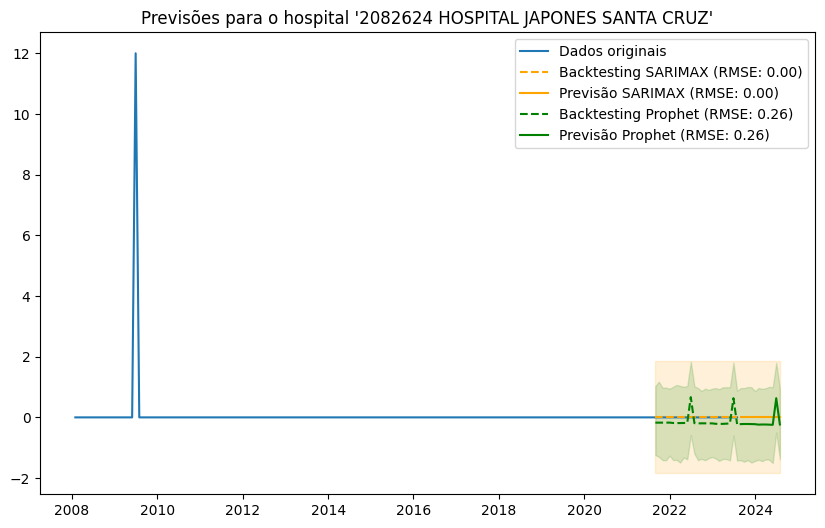

Previsão para o hospital '2077507 HOSPITAL LEFORTE - LIBERDADE':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1657.321, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1698.466, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1675.069, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1659.820, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1696.472, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1659.499, Time=0.48 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1659.950, Time=0.50 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1659.238, Time=2.28 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1659.312, Time=2.05 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1659.270, Time=0.19 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1659.570, Time=1.58 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1659.036, Time=1.22 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.74 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(3,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:55:12 - cmdstanpy - INFO - Chain [1] start processing
14:55:12 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 4.697545922768189
RMSE do modelo Prophet: 24.22992921995641
O modelo SARIMAX é o melhor para este hospital.


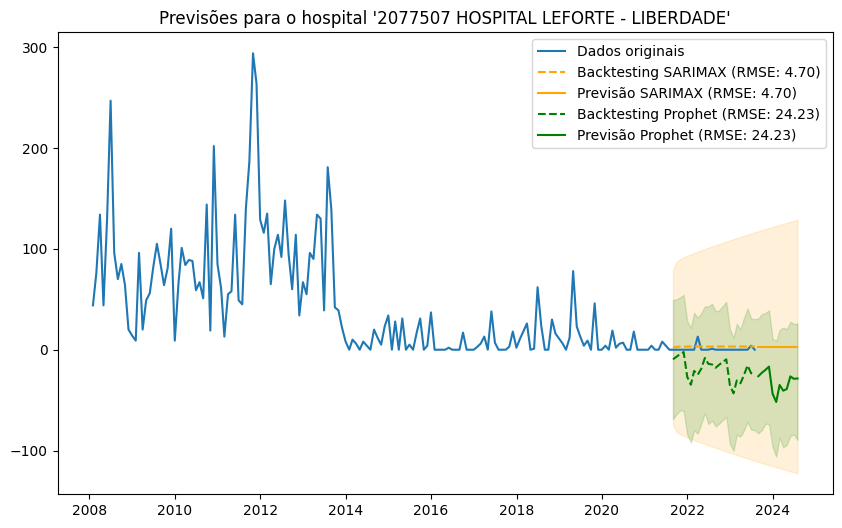

Previsão para o hospital '2076896 HOSPITAL SAO LUIZ GONZAGA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2272.158, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2317.963, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2271.414, Time=0.84 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2287.714, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2678.684, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2273.981, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2274.356, Time=0.49 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2274.569, Time=0.38 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2272.683, Time=0.06 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2272.115, Time=0.60 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=2311.700, Time=0.32 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2270.617, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2272.885, Time=0.14 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2263.377, Time=2.06 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=2268.433, Time=1.74

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:55:29 - cmdstanpy - INFO - Chain [1] start processing
14:55:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 409.1232104467136
RMSE do modelo Prophet: 374.44262375653295
O modelo Prophet é o melhor para este hospital.


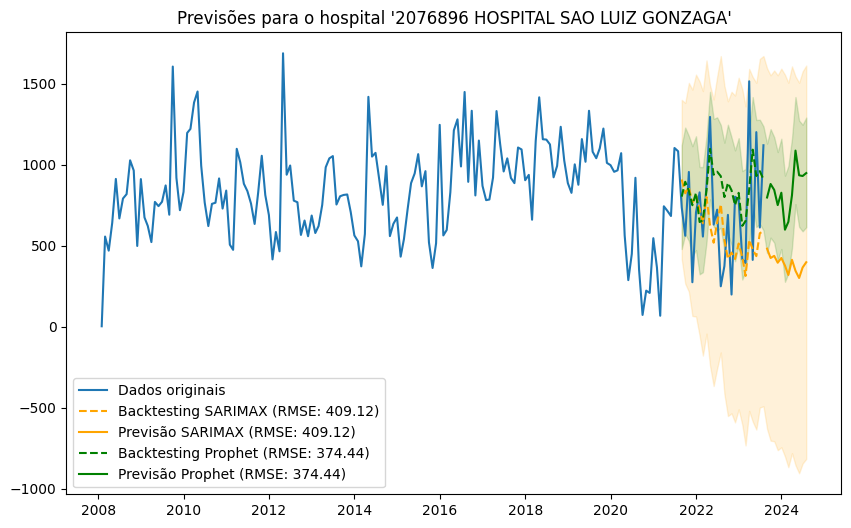

Previsão para o hospital '6891411 IBCC UNIDADE JACANA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=781.748, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=820.352, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=792.164, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=780.377, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=818.352, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=819.519, Time=0.35 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=782.309, Time=0.16 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=782.303, Time=0.30 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=792.198, Time=0.08 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=784.217, Time=0.90 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=778.497, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=780.428, Time=0.12 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=780.421, Time=0.20 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=791.450, Time=0.06 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=782.329, Time=0.71 sec
 ARIMA(1,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:55:36 - cmdstanpy - INFO - Chain [1] start processing
14:55:36 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 13.648338536008351
RMSE do modelo Prophet: 12.988321856425378
O modelo Prophet é o melhor para este hospital.


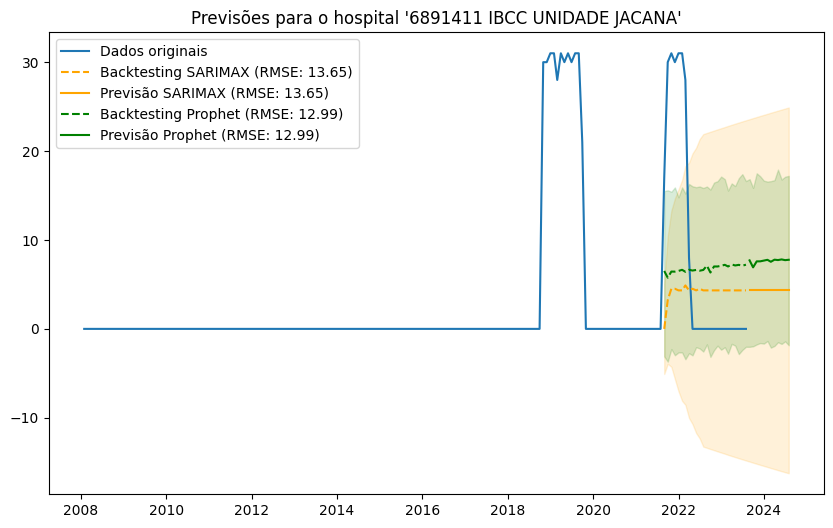

Previsão para o hospital '2077590 INST BRAS. CONTROLE CANCER-IBCC':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1610.623, Time=3.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1666.739, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1623.072, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1605.275, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1664.873, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1606.359, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1606.405, Time=0.55 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1607.147, Time=0.65 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1605.105, Time=0.21 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1607.011, Time=0.50 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1663.760, Time=0.16 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1607.105, Time=0.25 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1607.105, Time=0.31 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1606.854, Time=0.44 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:55:47 - cmdstanpy - INFO - Chain [1] start processing
14:55:47 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 58.106344953019146
RMSE do modelo Prophet: 55.82813706481484
O modelo Prophet é o melhor para este hospital.


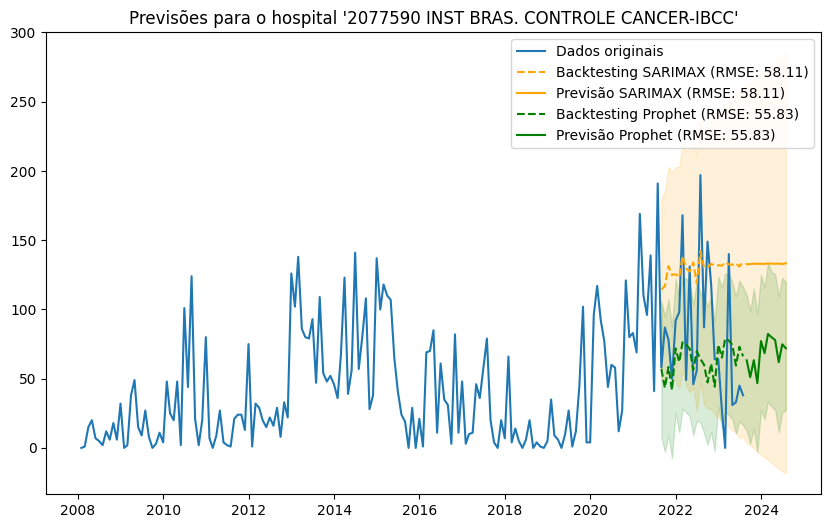

Previsão para o hospital '2091550 INST CEMA DE OFTALMO E OTORRINO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1080.968, Time=1.33 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1073.026, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1073.628, Time=0.77 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1073.985, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1139.237, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1075.006, Time=0.19 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1075.005, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1076.995, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1071.657, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1073.628, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1075.626, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1073.103, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1072.978, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1072.018, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1074.947, Time=0.15

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:55:52 - cmdstanpy - INFO - Chain [1] start processing
14:55:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 8.725917809564619
RMSE do modelo Prophet: 7.621737058625629
O modelo Prophet é o melhor para este hospital.


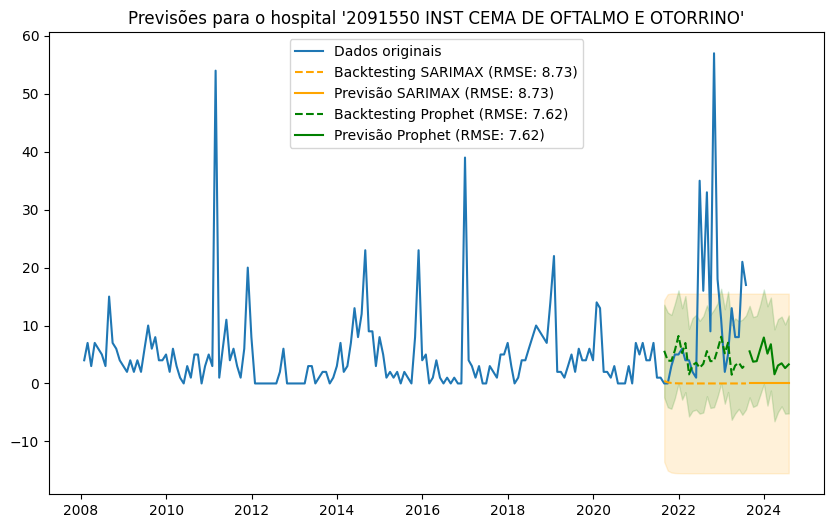

Previsão para o hospital '6123740 INST DO CANCER DO ESTADO DE SAO PAULO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2279.215, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2232.355, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2208.139, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2277.277, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2206.854, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2207.988, Time=0.28 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2208.831, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2208.835, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2230.620, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2207.821, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2206.811, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2207.892, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=2208.063, Time=0.11 sec
 ARIM

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:56:00 - cmdstanpy - INFO - Chain [1] start processing
14:56:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 223.60599752054478
RMSE do modelo Prophet: 263.6734667828035
O modelo SARIMAX é o melhor para este hospital.


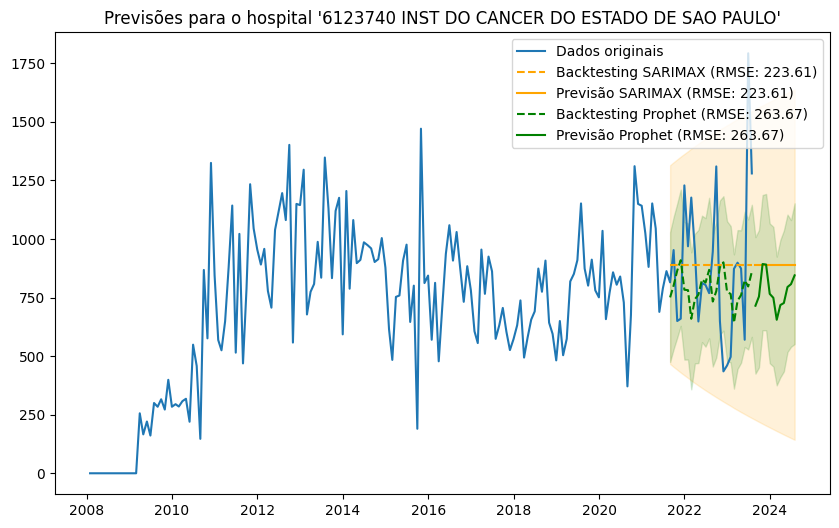

Previsão para o hospital '2071568 INST DO CORACAO - INCOR - HC/FMUSP':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2195.671, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2253.358, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2224.560, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2196.987, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2251.383, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2198.899, Time=2.07 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2198.646, Time=0.93 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2197.178, Time=2.68 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2197.693, Time=2.19 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2197.667, Time=0.34 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2196.411, Time=1.77 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2194.737, Time=1.95 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2192.975, Time=1.68 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2196.748, Time=0.66 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=2194.561, Time=1.86

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:56:37 - cmdstanpy - INFO - Chain [1] start processing
14:56:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 254.41345606968517
RMSE do modelo Prophet: 307.6305426071686
O modelo SARIMAX é o melhor para este hospital.


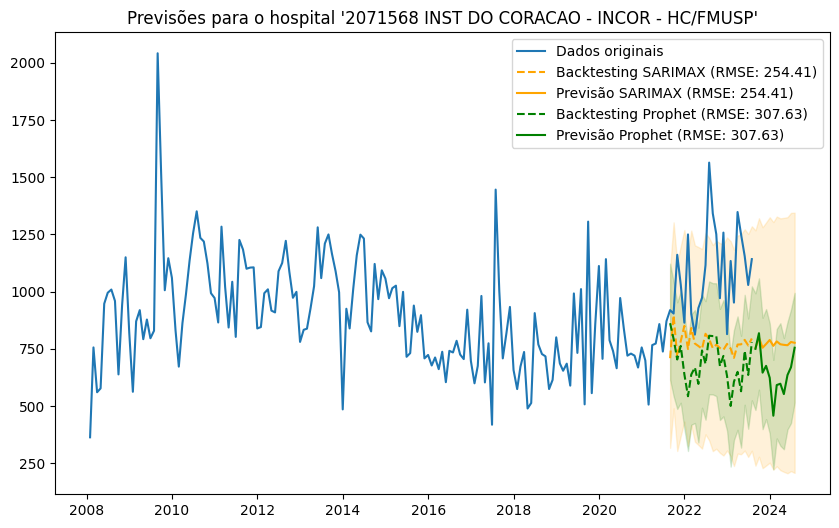

Previsão para o hospital '2080125 INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1691.450, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1667.397, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1644.212, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1689.543, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1642.213, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1644.212, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1646.127, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1637.284, Time=0.14 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1639.213, Time=0.24 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1639.219, Time=0.30 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=1641.281, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,3)(0

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:56:46 - cmdstanpy - INFO - Chain [1] start processing
14:56:46 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 46.167875523031846
RMSE do modelo Prophet: 42.692630190505
O modelo Prophet é o melhor para este hospital.


Previsão para o hospital '2688689 SANTA CASA DE SAO PAULO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2417.452, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2385.223, Time=0.60 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2362.104, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2415.459, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2362.501, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2363.372, Time=0.38 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2363.007, Time=0.84 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2362.664, Time=0.16 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2364.996, Time=1.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2419.105, Time=0.45 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2385.123, Time=0.16 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2360.145, Time=0.53 sec
 ARIMA(1,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_15608\4183309160.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
14:56:58 - cmdstanpy - INFO - Chain [1] start processing
14:56:58 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE do modelo SARIMAX: 314.7078544672471
RMSE do modelo Prophet: 466.67934434336513
O modelo SARIMAX é o melhor para este hospital.


            2077531 A C CAMARGO CANCER CENTER  \
2021-08-31                          60.274718   
2021-09-30                          57.035996   
2021-10-31                          59.326357   
2021-11-30                          58.518462   
2021-12-31                          57.870934   
2022-01-31                          59.499415   
2022-02-28                          57.580392   
2022-03-31                          59.138790   
2022-04-30                          58.357854   
2022-05-31                          58.264440   
2022-06-30                          59.039065   
2022-07-31                          57.951913   
2022-08-31                          58.954934   
2022-09-30                          58.332102   
2022-10-31                          58.452454   
2022-11-30                          58.777697   
2022-12-31                          58.191608   
2023-01-31                          58.807368   
2023-02-28                          58.358950   
2023-03-31          

In [30]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
#from fbprophet import Prophet
from pandas.tseries.offsets import DateOffset
import pandas as pd
import matplotlib.pyplot as plt

# Função para preparar a visão de internações por mês/ano de um hospital específico
def prepare_time_series_for_hospital(data, hospital_name):
    data_hospital = data[data['Hospital'].str.contains(hospital_name, na=False, case=False)]
    if data_hospital.empty:
        print(f"Hospital '{hospital_name}' não encontrado.")
        return None
    data_hospital.set_index(['Ano', 'Mês'], inplace=True)
    data_hospital.sort_index(inplace=True)
    data_hospital = data_hospital['Internações']
    data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')
    return data_hospital

# Função de previsão usando SARIMAX com auto_arima
def forecast_time_series(data, steps=36):
    model = auto_arima(data[:-24], seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True, max_order=None)
    sarimax_model = SARIMAX(data[:-24], order=model.order, seasonal_order=model.seasonal_order)
    fitted_model = sarimax_model.fit(disp=False)
    forecast = fitted_model.get_forecast(steps=steps)
    forecast_index = pd.date_range(data.index[-1] - DateOffset(months=23), periods=steps, freq='M')
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
        'Lower CI': forecast_conf_int.iloc[:, 0],
        'Upper CI': forecast_conf_int.iloc[:, 1]
    }, index=forecast_index)
    return forecast_df

# Função de previsão usando Prophet
def forecast_time_series_prophet(data):
    data_prophet = pd.DataFrame({
        'ds': data.index[:-24],
        'y': data.values[:-24]
    })
    prophet_model = Prophet()
    prophet_model.fit(data_prophet)
    future = prophet_model.make_future_dataframe(periods=36, freq='M')
    forecast = prophet_model.predict(future)
    return forecast.set_index('ds')[-36:][['yhat', 'yhat_lower', 'yhat_upper']]

# Função para calcular o RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return sqrt(mse)

# Carregar o arquivo CSV
data = df_serie_hist
hospital_names = data['Hospital'].unique()
forecast_df = pd.DataFrame()

for hospital_name in hospital_names:
    print(f"Previsão para o hospital '{hospital_name}':")
    hospital_time_series = prepare_time_series_for_hospital(data, hospital_name)
    if hospital_time_series is not None:
        hospital_forecast_sarimax = forecast_time_series(hospital_time_series)
        hospital_forecast_prophet = forecast_time_series_prophet(hospital_time_series)
        rmse_sarimax = calculate_rmse(hospital_time_series[-36:-12], hospital_forecast_sarimax['Forecast'][:-12])
        rmse_prophet = calculate_rmse(hospital_time_series[-36:-12], hospital_forecast_prophet['yhat'][:-12])
        print(f"RMSE do modelo SARIMAX: {rmse_sarimax}")
        print(f"RMSE do modelo Prophet: {rmse_prophet}")
        if rmse_sarimax < rmse_prophet:
            print("O modelo SARIMAX é o melhor para este hospital.")
            best_forecast = hospital_forecast_sarimax['Forecast']
        else:
            print("O modelo Prophet é o melhor para este hospital.")
            best_forecast = hospital_forecast_prophet['yhat']
        forecast_df[hospital_name] = best_forecast
        plt.figure(figsize=(10, 6))
        plt.plot(hospital_time_series, label='Dados originais')
        plt.plot(hospital_forecast_sarimax['Forecast'][:-12], '--', color='orange', label=f'Backtesting SARIMAX (RMSE: {rmse_sarimax:.2f})')
        plt.plot(hospital_forecast_sarimax['Forecast'][-12:], color='orange', label=f'Previsão SARIMAX (RMSE: {rmse_sarimax:.2f})')
        plt.fill_between(hospital_forecast_sarimax.index, hospital_forecast_sarimax['Lower CI'], hospital_forecast_sarimax['Upper CI'], color='orange', alpha=.15)
        plt.plot(hospital_forecast_prophet['yhat'][:-12], '--', color='green', label=f'Backtesting Prophet (RMSE: {rmse_prophet:.2f})')
        plt.plot(hospital_forecast_prophet['yhat'][-12:], color='green', label=f'Previsão Prophet (RMSE: {rmse_prophet:.2f})')
        plt.fill_between(hospital_forecast_prophet.index, hospital_forecast_prophet['yhat_lower'], hospital_forecast_prophet['yhat_upper'], color='green', alpha=.15)
        plt.legend()
        plt.title(f"Previsões para o hospital '{hospital_name}'")
        plt.show()

print(forecast_df)